# <a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
  <h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#000000; border:0' role="tab" aria-controls="home">
    <center><strong>EXPLORATORY ANALYSIS</strong></center>
  </h2>
</div>


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Importing Libraries*** ###

In [6]:
%pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 72.7 MB/s eta 0:00:00


In [7]:
%pip install leafmap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.7 MB/s eta 0:00:00


In [8]:
import geopandas as gpd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import rasterio as rio
from rasterio.enums import Resampling
import json
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from PIL import ImageColor
import skimage as ski
from skimage.exposure import rescale_intensity
import scipy
from rasterio.features import shapes
import rasterio.plot as rplot
import leafmap
import seaborn as sns

## ***Data Preparation and Visualization***

In [11]:
sample_dr = r"/content/drive/MyDrive/ML_Project/Bands_Indices_Sample_Data.geojson"
raster_dr = r"/content/drive/MyDrive/ML_Project/sentinel2_2024cc30.tif"

***Displaying data in geodataframe***

A **GeoDataFrame** is a data structure provided by the Python library GeoPandas. It is designed to work with **geospatial data efficiently**. It extends the functionalities of a standard Pandas DataFrame by adding support for spatial operations and geometries such as points, lines, and polygons.

My data is a **spatial data** of which will need a package which will be able to maintain the spatial properties hence **GeodataFrame** from Pandas was best to handle that and that was the major reason for using it.

In [12]:
gdf = gpd.read_file(sample_dr)
gdf.head()

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0  0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1  0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2  0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3  0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4  0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   

       B9     B11     B12      NDVI      NDWI      NDBI  Class  \
0  0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387      1   
1  0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644      1   
2  0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387      1   
3  0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414      1   
4  0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286      1   

                     geometry  
0  POINT (-91.19764 30.48437)  
1  POINT (-91.19854 30.48267)  
2   POINT (-91.1989 30.48159)  
3  POINT (-91.19629 30.48384)  
4  POINT (-91.19629 30.48177)

***Visualizing data point***

In [13]:
import leafmap as leafmap
m = leafmap.Map(
    center = [30.451189416235763,-91.17734163717974] ,
    zoom = 13)

m.add_markers(
    sample_dr,
    layer_name="Training Data",
    fill_color="yellow",
    radius=3,
    stroke=True,
    weight=2,
    fill_opacity=1,
    shape='circle')
m

Map(center=[30.451189416235763, -91.17734163717974], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [14]:
sentinel = rio.open(raster_dr)
sentinel_image = sentinel.read()

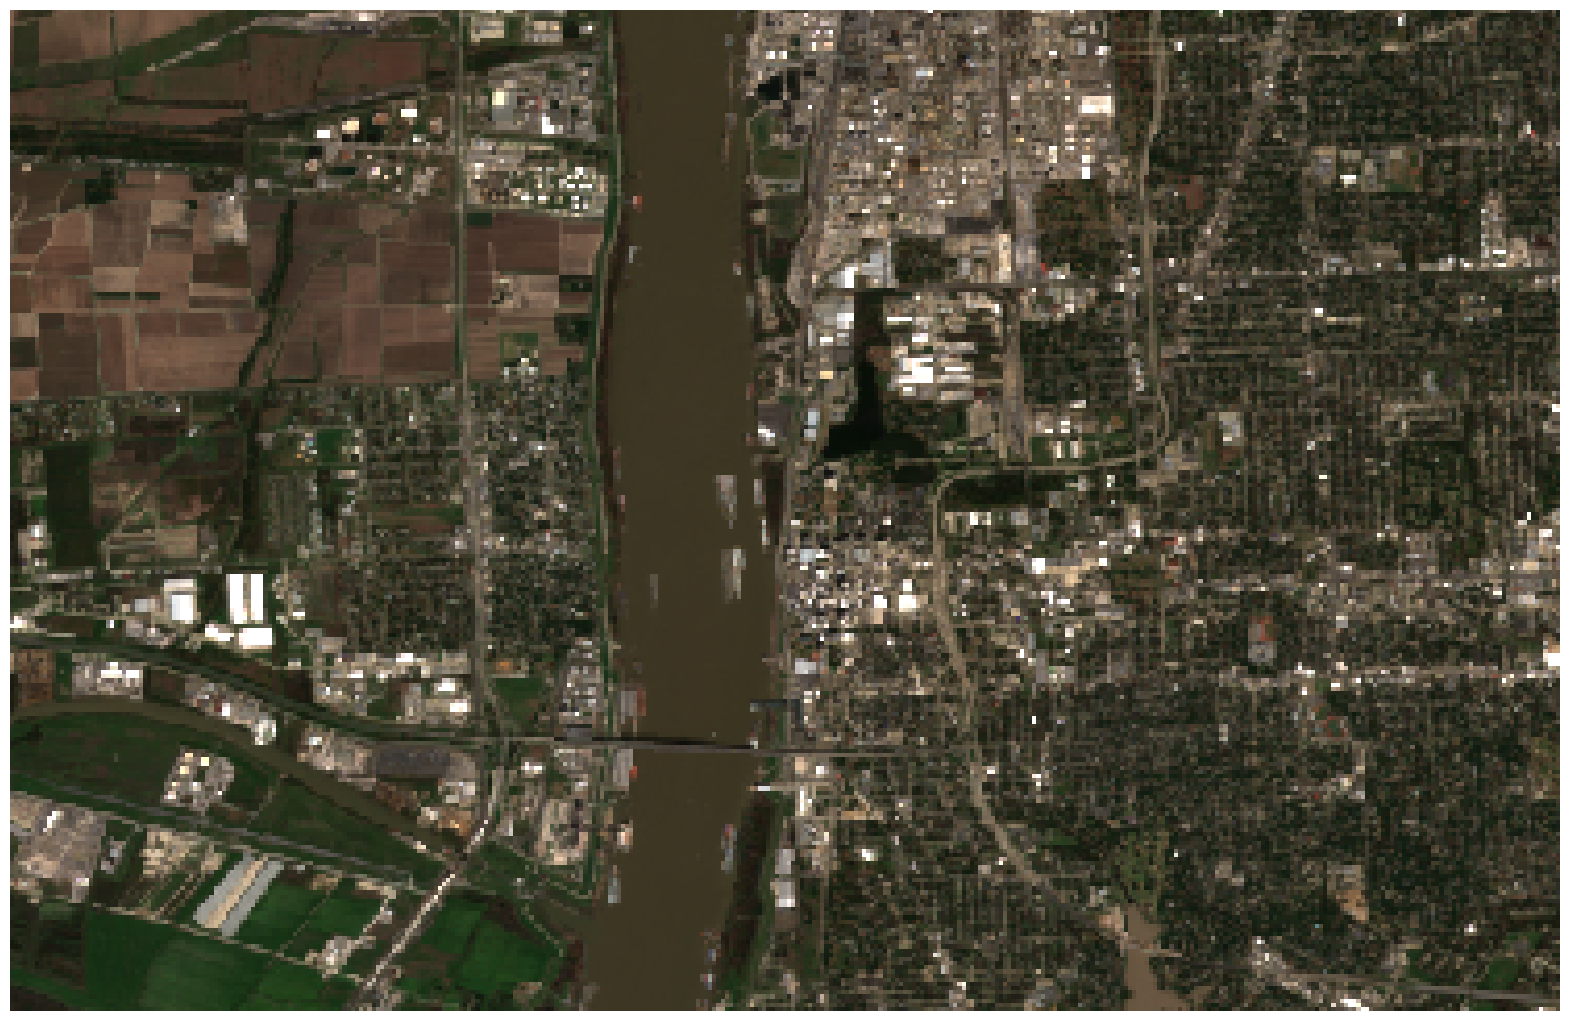

In [15]:
# Transpose the sentinel image to get the correct dimensions
sentinel_image = sentinel_image.transpose(1, 2, 0)

# Extract the red, green, and blue bands
red = sentinel_image[:, :, 3]
green = sentinel_image[:, :, 2]
blue = sentinel_image[:, :, 1]

# Stack the bands to create an RGB image
rgb = np.dstack((red, green, blue))

# Plot the RGB image with an appropriate scaling factor
plt.figure(figsize=[20, 20])
plt.imshow(rgb * 2.5)  # Adjust the scaling factor as needed
plt.axis('off')
plt.show()

<Axes: >

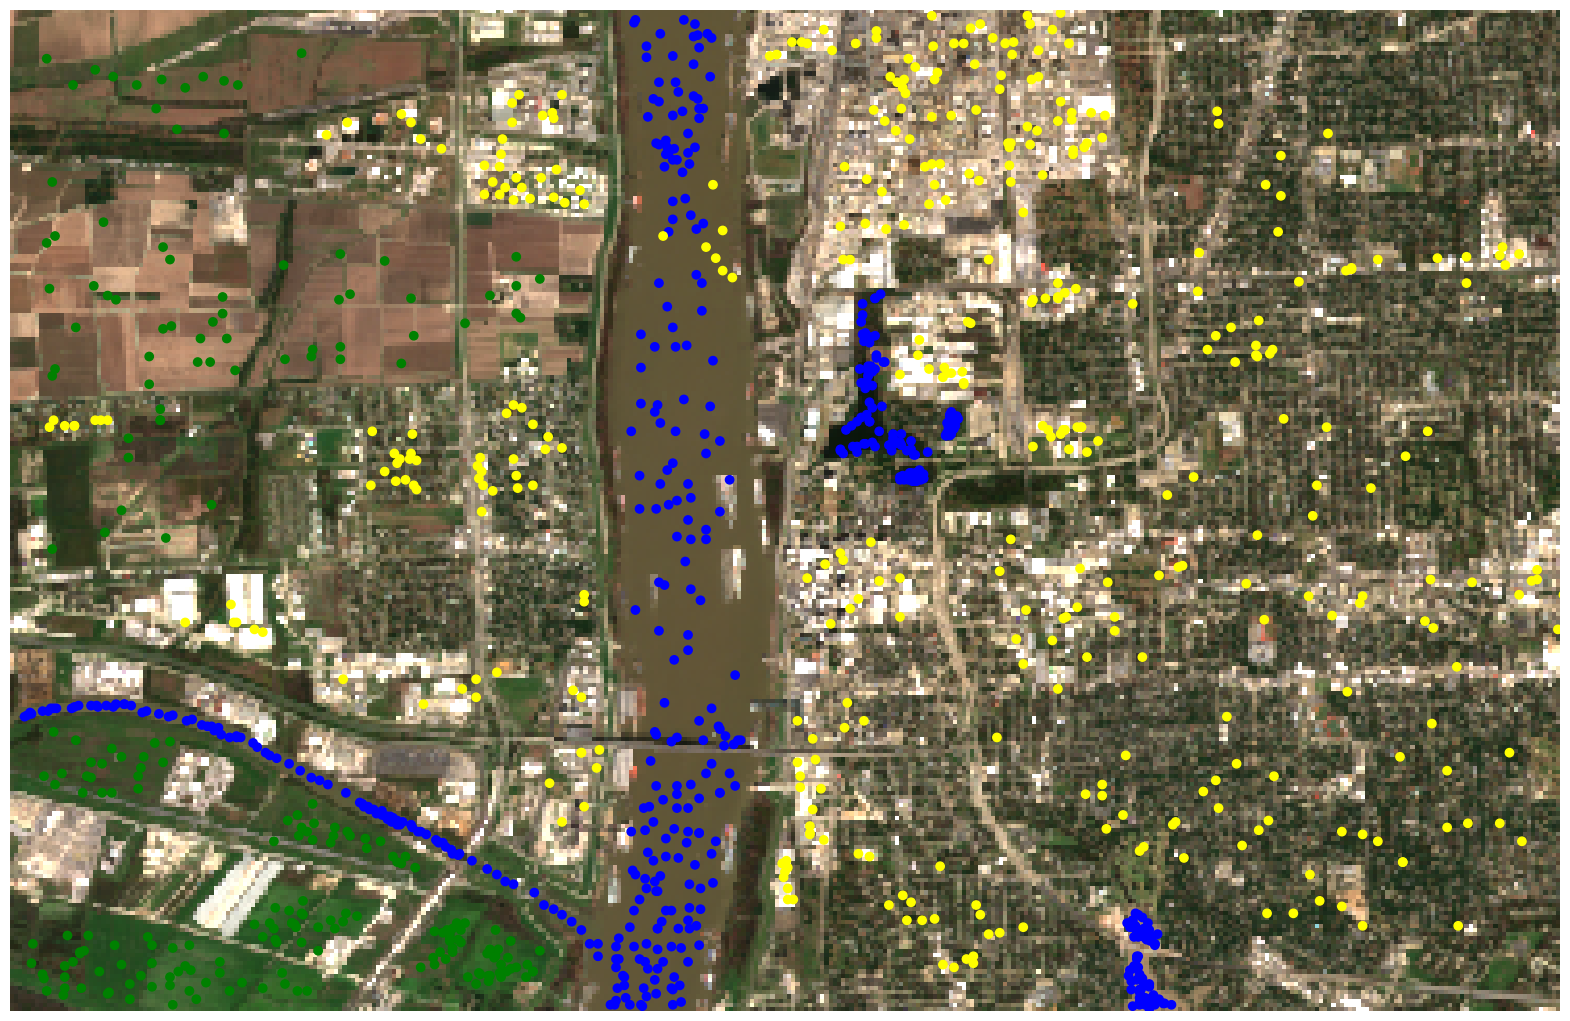

In [16]:
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import rasterio.plot as rplot

cmap = ListedColormap(['blue','yellow','green'])
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(column='Class', categorical=True, cmap=cmap, legend=False, ax=ax)
ax.axis('off')
rplot.show(rgb.transpose([2,0,1])*4, transform=sentinel.transform, ax=ax)

***Creating Workflow for each class***

In [17]:
# Define the mapping
class_mapping = {1: 'waterbody', 2: 'built_up', 3: 'bareland'}

# Add a new column 'Class_Label' based on the mapping
gdf['Class_Label'] = gdf['Class'].map(class_mapping)

# Display the updated Data
gdf.head()

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0  0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1  0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2  0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3  0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4  0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   

       B9     B11     B12      NDVI      NDWI      NDBI  Class  \
0  0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387      1   
1  0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644      1   
2  0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387      1   
3  0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414      1   
4  0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286      1   

                     geometry Class_Label  
0  POINT (-91.19764 30.48437)   waterbody  
1  POINT (-91.19854 30.48267)   waterbody  
2   POINT (-91.1989 30.48159)   waterbody  
3  POINT (-91.19629 30.48384)   waterbody  
4  POINT (-91.19629 30.48177)   waterbody

***Dropping the Class_Label for Statistics Operation***

In [18]:
# Check if the columns exist before dropping them
columns_to_drop = ['Class',]
existing_columns_to_drop = [col for col in columns_to_drop if col in gdf.columns]

if existing_columns_to_drop:
	Data = gdf.drop(columns=existing_columns_to_drop)

# Extract latitude and longitude from the geometry column
Data['Latitude'] = Data.geometry.y
Data['Longitude'] = Data.geometry.x

# Drop the geometry column

Data

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0     0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1     0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2     0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3     0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4     0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1120  0.0537  0.0917  0.0972  0.1056  0.1142  0.1397  0.1434  0.1343  0.1633   
1121  0.0541  0.0937  0.1042  0.1186  0.1396  0.2060  0.2159  0.1846  0.2546   
1122  0.0463  0.0451  0.0682  0.0772  0.1137  0.1571  0.1843  0.1880  0.2070   
1123  0.0623  0.0741  0.0965  0.1262  0.1430  0.1658  0.1755  0.1848  0.1911   
1124  0.0631  0.0720  0.0894  0.1166  0.1400  0.1516  0.1578  0.1727  0.1802   

          B9     B11     B12      NDVI      NDWI      NDBI  \
0     0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387   
1     0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644   
2     0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387   
3     0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414   
4     0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286   
...      ...     ...     ...       ...       ...       ...   
1120  0.2172  0.1915  0.1507  0.119633 -0.175568  0.175568   
1121  0.2427  0.2665  0.1926  0.217678 -0.181556  0.181556   
1122  0.2366  0.2382  0.1504  0.417798 -0.117785  0.117785   
1123  0.1827  0.3008  0.2502  0.188424 -0.238880  0.238880   
1124  0.1761  0.2890  0.2336  0.193916 -0.251895  0.251895   

                        geometry Class_Label   Latitude  Longitude  
0     POINT (-91.19764 30.48437)   waterbody  30.484374 -91.197641  
1     POINT (-91.19854 30.48267)   waterbody  30.482667 -91.198540  
2      POINT (-91.1989 30.48159)   waterbody  30.481589 -91.198899  
3     POINT (-91.19629 30.48384)   waterbody  30.483835 -91.196294  
4     POINT (-91.19629 30.48177)   waterbody  30.481769 -91.196294  
...                          ...         ...        ...        ...  
1120  POINT (-91.23591 30.43658)    bareland  30.436584 -91.235910  
1121  POINT (-91.23771 30.43712)    bareland  30.437123 -91.237706  
1122  POINT (-91.23842 30.43766)    bareland  30.437662 -91.238425  
1123  POINT (-91.23025 30.43991)    bareland  30.439907 -91.230250  
1124   POINT (-91.2307 30.43856)    bareland  30.438560 -91.230699  

[1125 rows x 19 columns]

***Checking for missing values***

In [19]:
# Check for missing values in the Data dataframe
missing_values = Data.isnull().sum()

# Display the missing values
print(missing_values)

B1             0
B2             0
B3             0
B4             0
B5             0
B6             0
B7             0
B8             0
B8A            0
B9             0
B11            0
B12            0
NDVI           0
NDWI           0
NDBI           0
geometry       0
Class_Label    0
Latitude       0
Longitude      0
dtype: int64


### ***Performing Statistics of the Data***

In [20]:
# Get statistics for each column except 'Class_Label'
statistics = Data.drop(columns=['Class_Label','geometry']).describe()

# Get variance for each column except 'Class_Label'
variance = Data.drop(columns=['Class_Label','geometry']).var()

median = Data.drop(columns=['Class_Label','geometry']).median()

# Append variance to the statistics table
statistics.loc['variance'] = variance
statistics.loc['median'] = median

# Convert the statistics with variance to a dataframe
statistics_df = pd.DataFrame(statistics)
statistics_df

B1           B2           B3           B4           B5  \
count     1125.000000  1125.000000  1125.000000  1125.000000  1125.000000   
mean         0.065237     0.071687     0.097414     0.098782     0.124888   
std          0.048708     0.067706     0.070701     0.084117     0.086324   
min          0.015400     0.012300     0.019500     0.015800     0.022000   
25%          0.035400     0.037700     0.055700     0.041100     0.048300   
50%          0.045100     0.047200     0.078800     0.074500     0.114200   
75%          0.078500     0.084600     0.109600     0.130800     0.161000   
max          0.428100     0.600000     0.650400     0.708000     0.747600   
variance     0.002372     0.004584     0.004999     0.007076     0.007452   
median       0.045100     0.047200     0.078800     0.074500     0.114200   

                   B6           B7           B8          B8A           B9  \
count     1125.000000  1125.000000  1125.000000  1125.000000  1125.000000   
mean         0.155020     0.170333     0.174244     0.180561     0.186453   
std          0.110835     0.122431     0.131205     0.134636     0.121929   
min          0.015700     0.015500     0.009800     0.010900     0.008100   
25%          0.030900     0.033100     0.030700     0.024700     0.054600   
50%          0.177400     0.192800     0.196600     0.206900     0.211300   
75%          0.223900     0.249300     0.262000     0.274700     0.270400   
max          0.721200     0.720200     0.732000     0.721500     0.673100   
variance     0.012284     0.014989     0.017215     0.018127     0.014867   
median       0.177400     0.192800     0.196600     0.206900     0.211300   

                  B11          B12         NDVI         NDWI         NDBI  \
count     1125.000000  1125.000000  1125.000000  1125.000000  1125.000000   
mean         0.163604     0.121237     0.133857     0.100500    -0.100500   
std          0.135832     0.114738     0.387665     0.235962     0.235962   
min          0.007100     0.006800    -0.505495    -0.508353    -0.860854   
25%          0.018600     0.014800    -0.289233    -0.079427    -0.236246   
50%          0.177900     0.106900     0.116856     0.104089    -0.104089   
75%          0.263500     0.193100     0.424648     0.236246     0.079427   
max          0.787700     0.852900     0.887646     0.860854     0.508353   
variance     0.018450     0.013165     0.150284     0.055678     0.055678   
median       0.177900     0.106900     0.116856     0.104089    -0.104089   

             Latitude    Longitude  
count     1125.000000  1125.000000  
mean        30.449781   -91.195867  
std          0.019800     0.023557  
min         30.422570   -91.239683  
25%         30.431104   -91.213991  
50%         30.448082   -91.196653  
75%         30.465330   -91.179585  
max         30.487159   -91.139880  
variance     0.000392     0.000555  
median      30.448082   -91.196653

### ***Checking for Outliers and Non-correlation values***

***- Checking for Outliers***

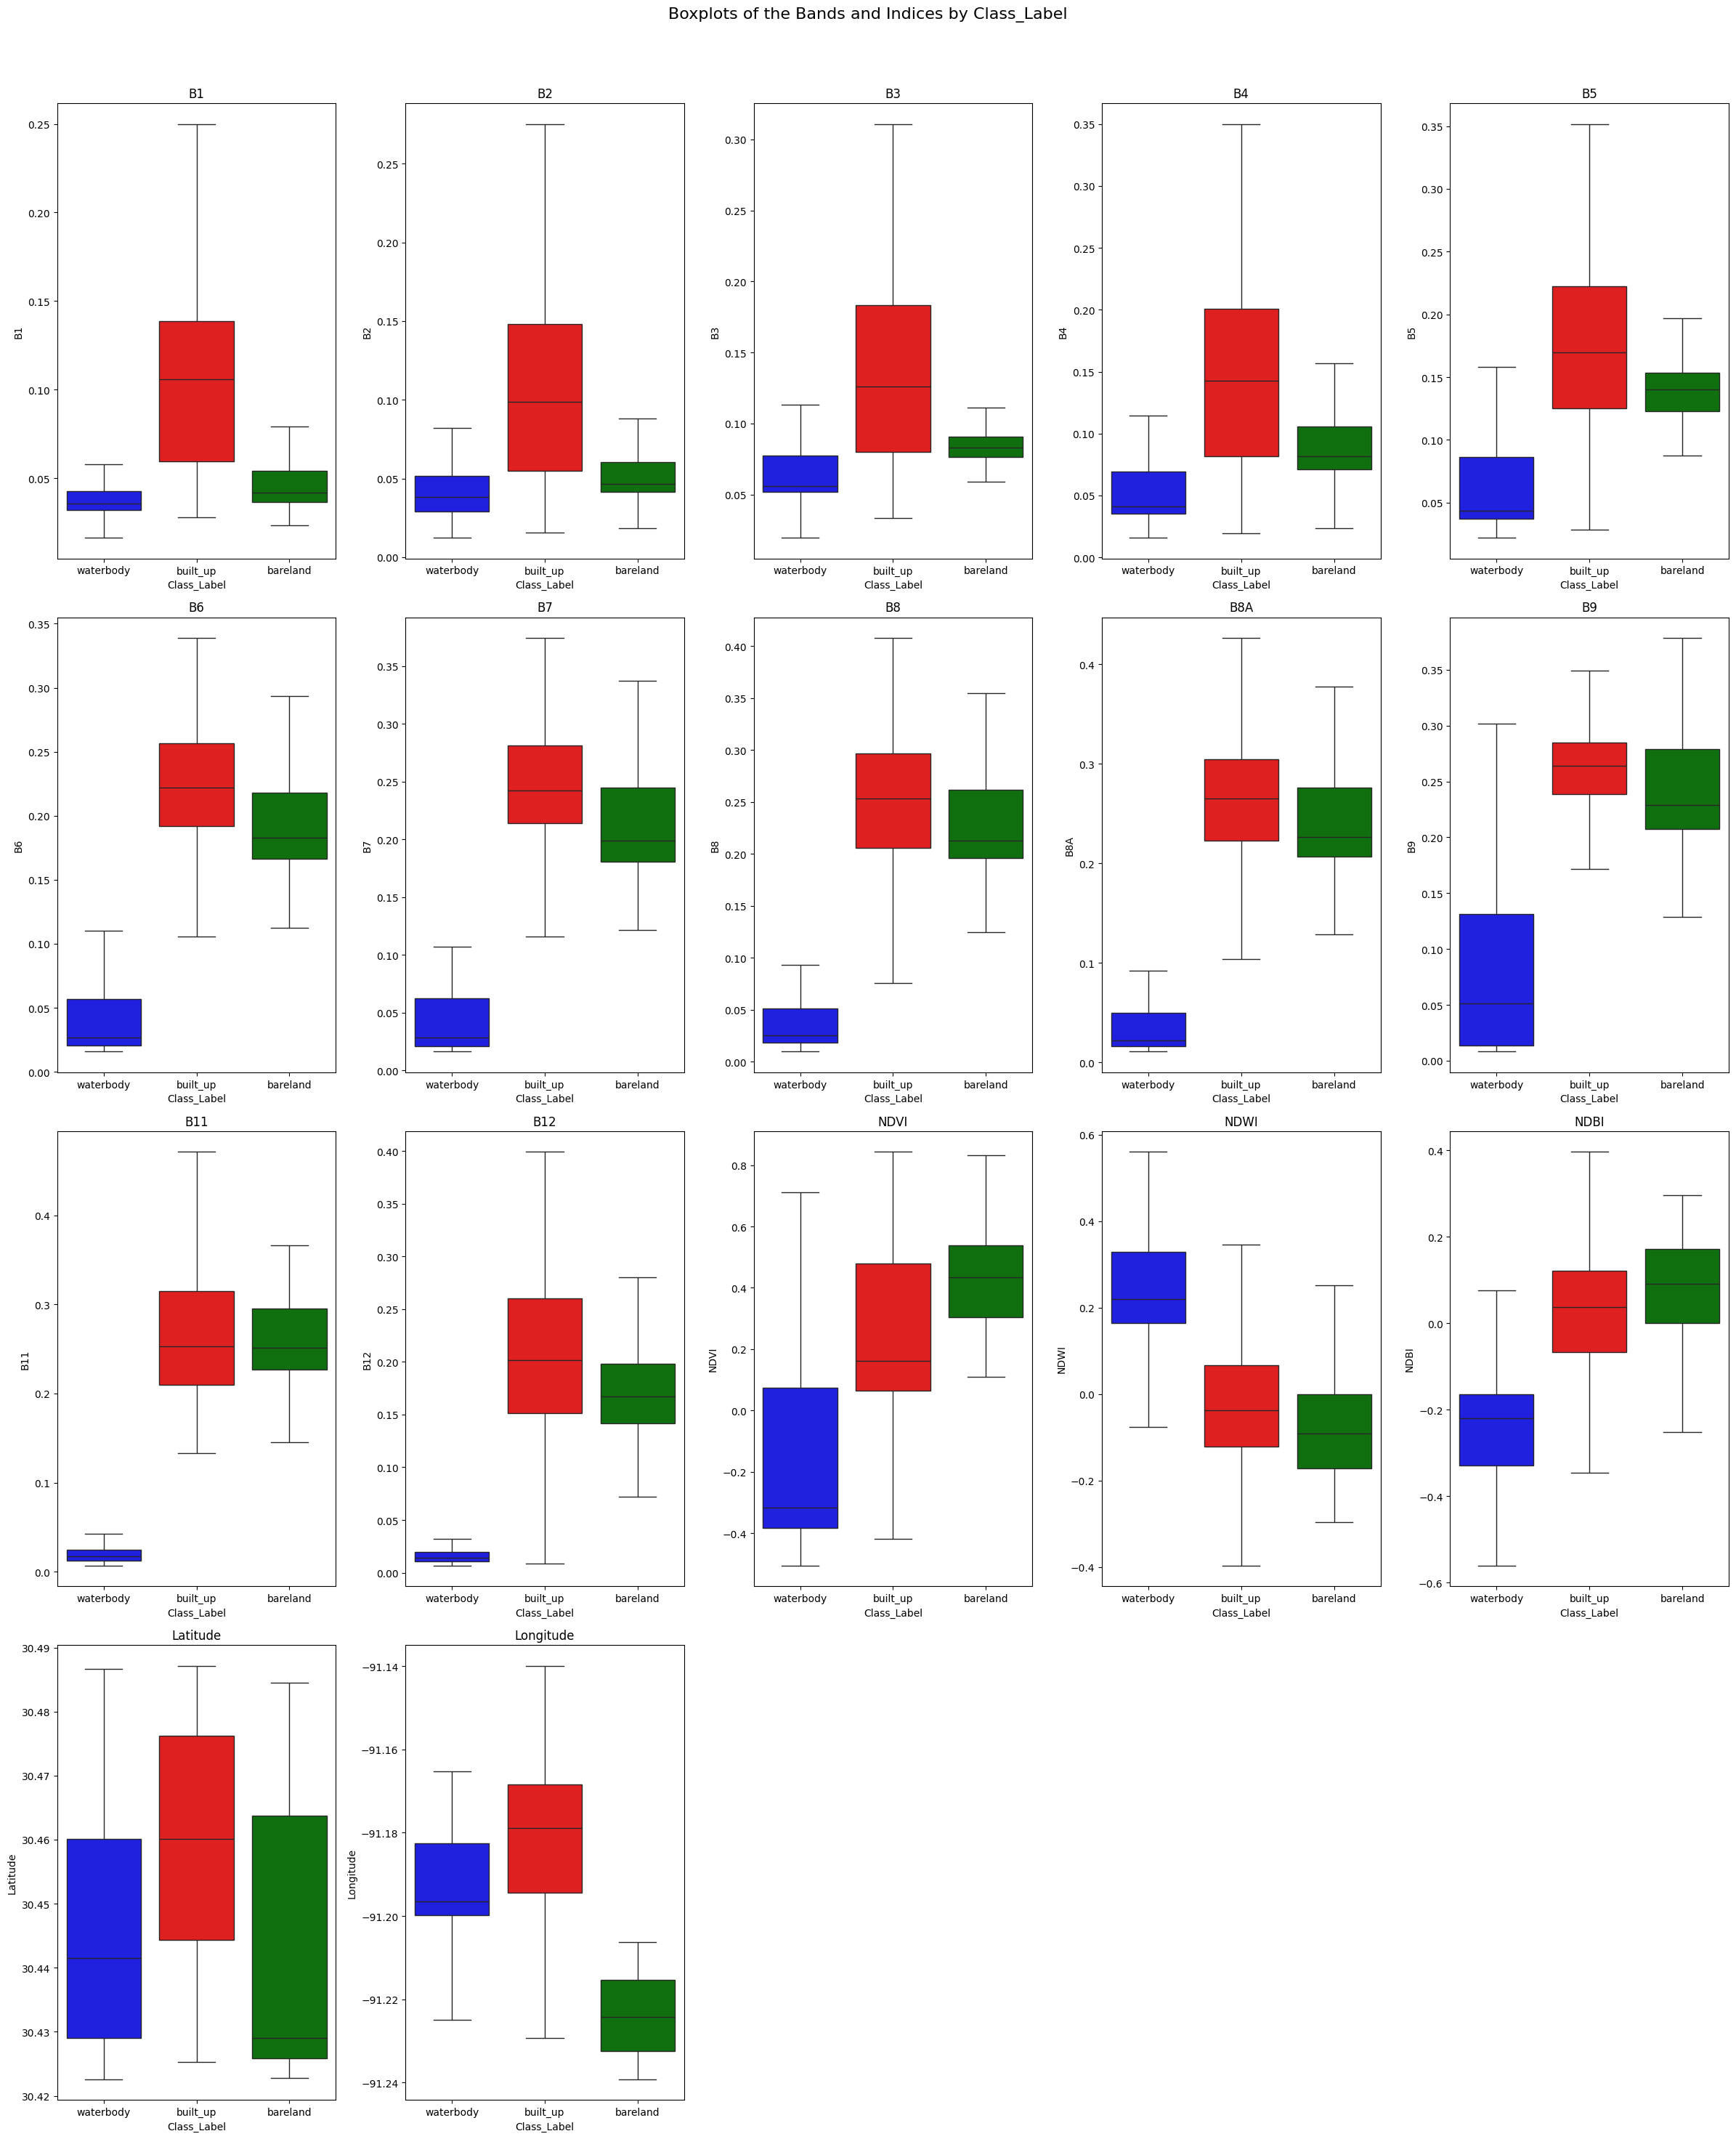

In [21]:
# Define the palette
palette = {
    'waterbody': 'blue',
    'built_up': 'red',
    'bareland': 'green'
}

# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24, 30))
fig.suptitle('Boxplots of the Bands and Indices by Class_Label', fontsize=16)

# Flatten the axes array for easy iteration
ax = ax.flatten()

# List of columns to plot
columns_to_plot = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'NDBI', 'Latitude', 'Longitude']

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Class_Label', y=column, data=Data, ax=ax[i], palette=palette, showfliers=False)
    ax[i].set_title(column)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



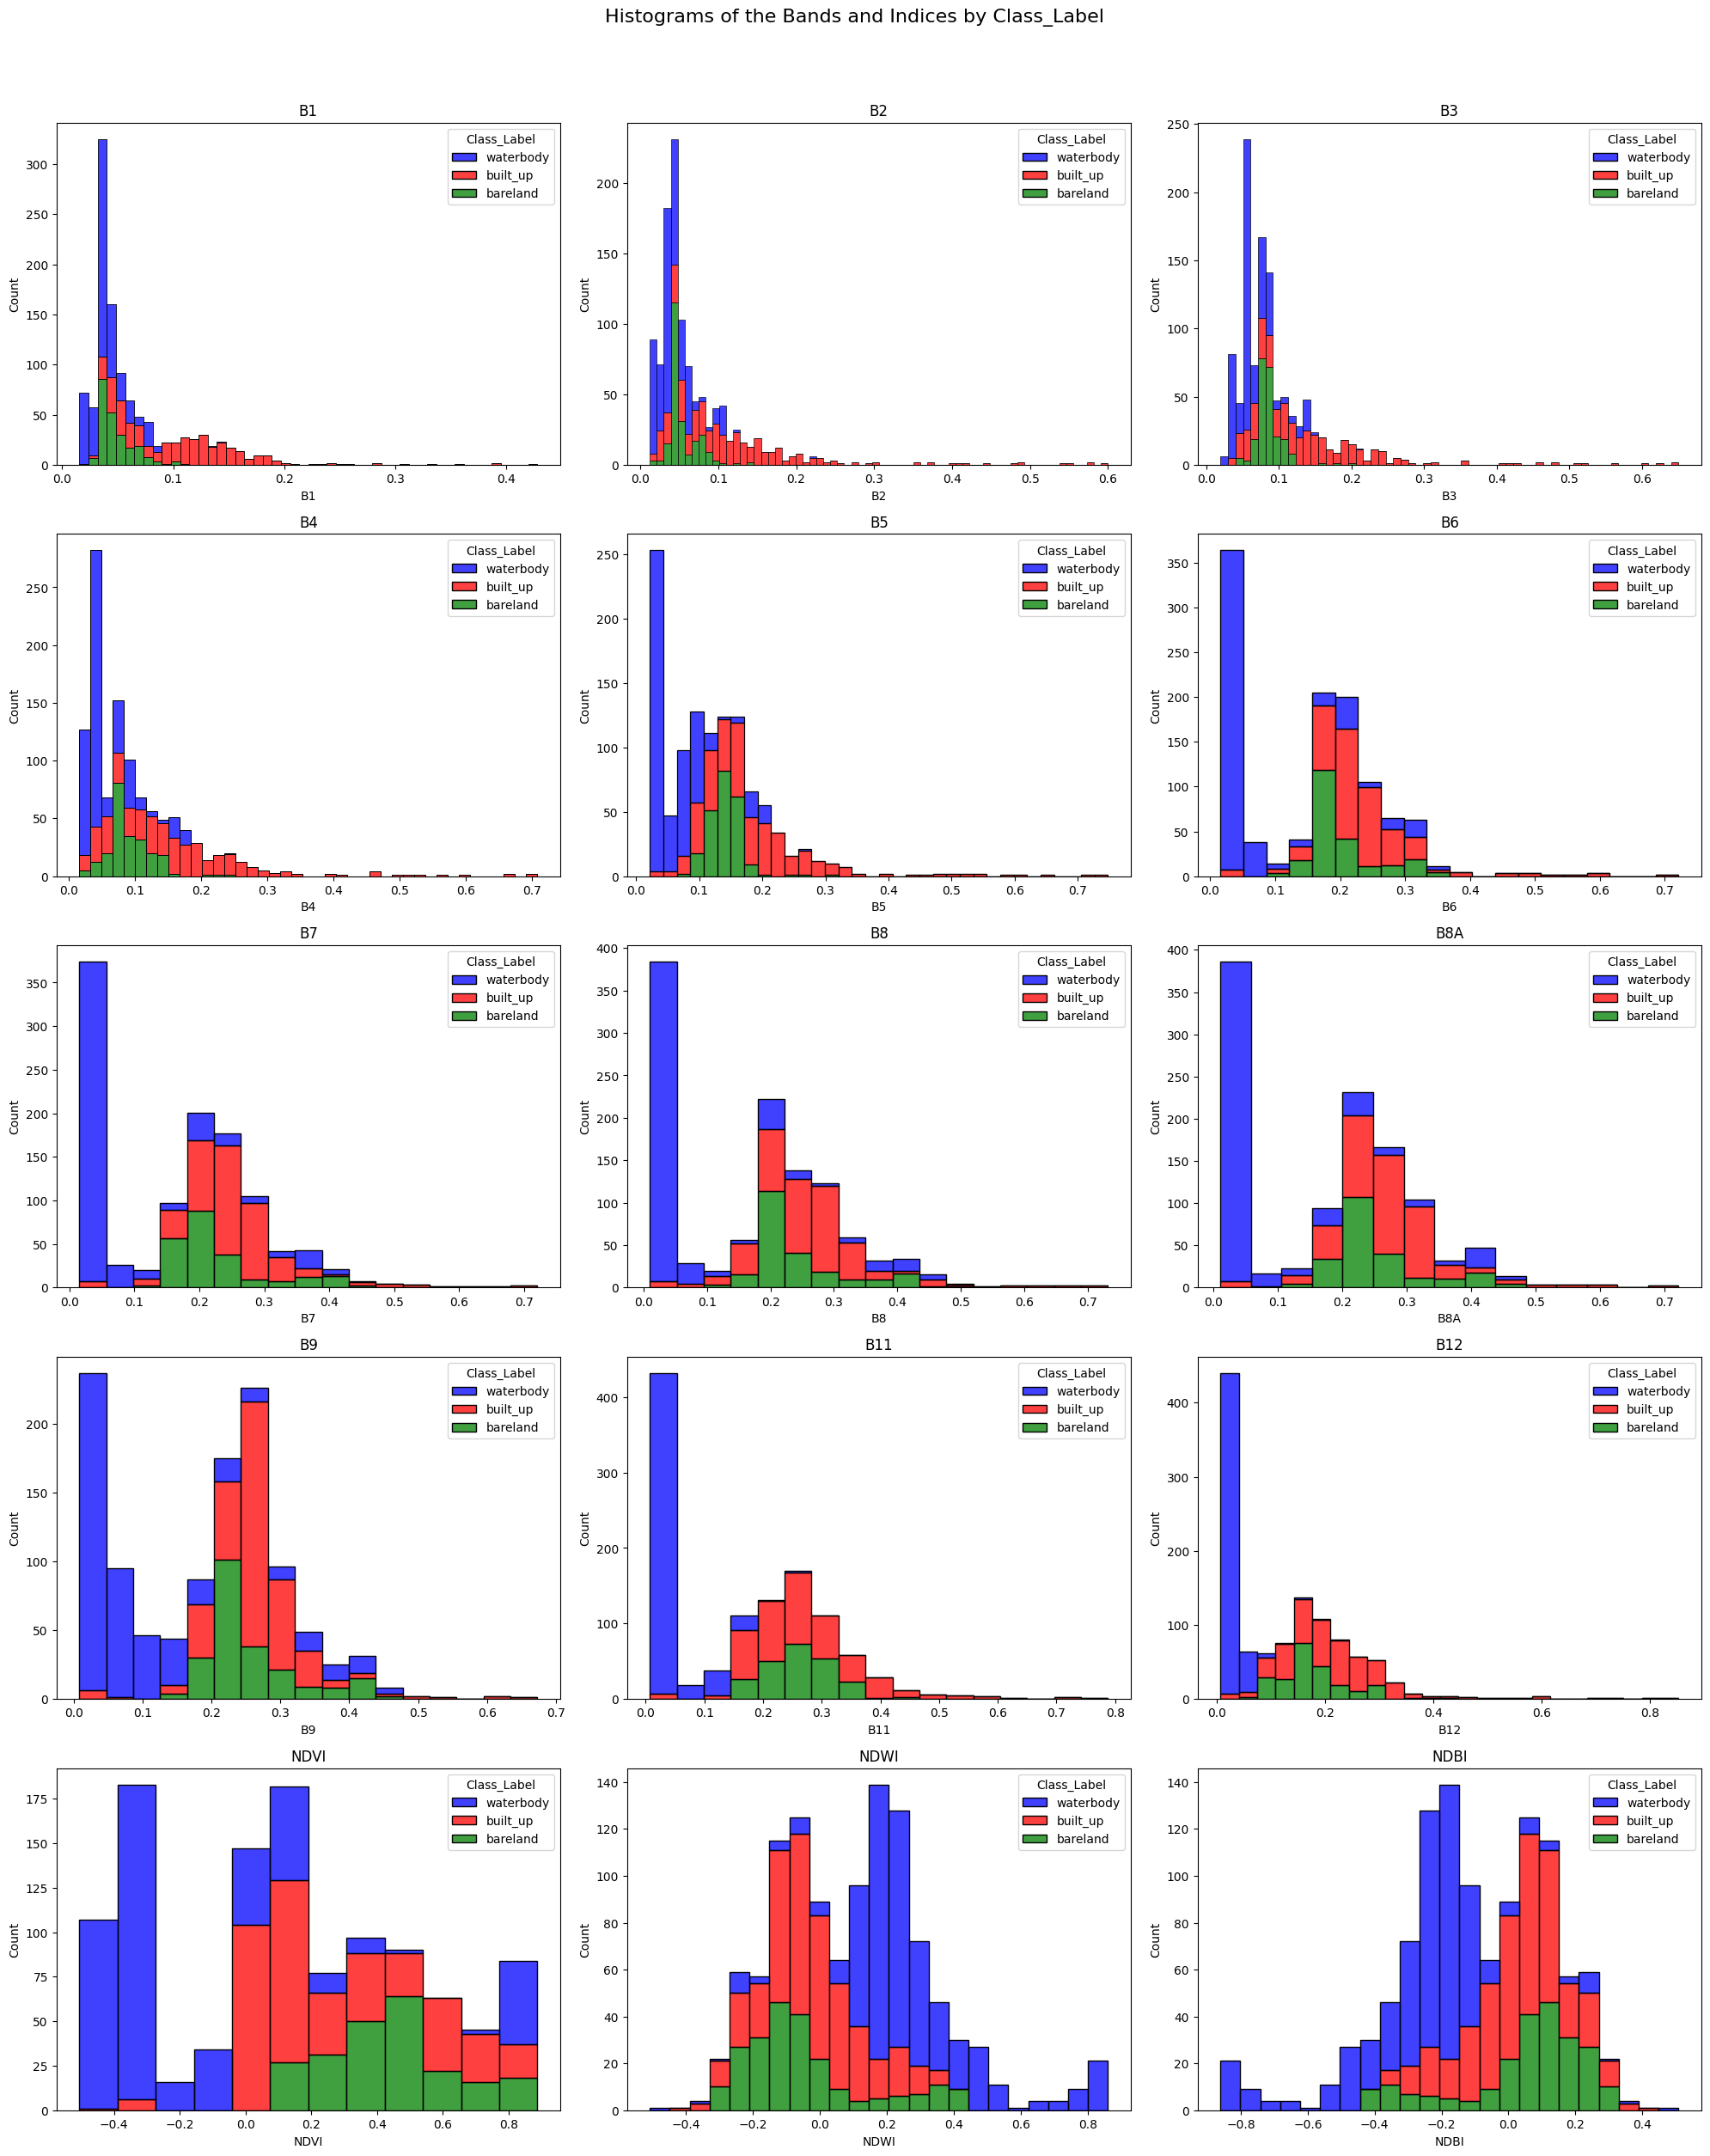

In [22]:
# Define the palette
palette = {
    'waterbody': 'blue',
    'built_up': 'red',
    'bareland': 'green'
}

# Create subplots
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
fig.suptitle('Histograms of the Bands and Indices by Class_Label', fontsize=16)

# Flatten the axes array for easy iteration
ax = ax.flatten()

# List of columns to plot
columns_to_plot = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'NDBI']

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=Data, x=column, hue='Class_Label', multiple='stack', palette=palette, ax=ax[i])
    ax[i].set_title(column)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

B1        B2        B3        B4        B5        B6        B7  \
0    -0.645714 -0.497764 -0.597349 -0.693174 -1.005823 -1.225062 -1.220274   
1    -0.651876 -0.516973 -0.641216 -0.739559 -1.052181 -1.215133 -1.224360   
2    -0.649822 -0.516973 -0.615745 -0.726476 -1.061452 -1.217841 -1.229262   
3    -0.643660 -0.500719 -0.591689 -0.696743 -0.994234 -1.211522 -1.218640   
4    -0.627228 -0.482987 -0.571879 -0.655115 -0.968737 -1.204301 -1.216188   
...        ...       ...       ...       ...       ...       ...       ...   
1120 -0.236972  0.295723 -0.003033  0.081093 -0.123869 -0.138283 -0.220083   
1121 -0.228756  0.325275  0.096020  0.235708  0.170502  0.460168  0.372351   
1122 -0.388967 -0.392852 -0.413394 -0.256683 -0.129663  0.018777  0.114131   
1123 -0.060330  0.035660 -0.012938  0.326099  0.209906  0.097306  0.042222   
1124 -0.043899  0.004630 -0.113406  0.211921  0.175138 -0.030869 -0.102413   

            B8       B8A        B9       B11       B12      NDVI      NDWI  \
0    -1.192128 -1.224291 -1.438793 -1.118085 -0.962944 -1.344139  0.444706   
1    -1.183741 -1.233951 -1.442075 -1.104828 -0.966432 -1.162356  0.276201   
2    -1.192128 -1.225778 -1.398587 -1.118085 -0.979511 -1.264469  0.444706   
3    -1.178403 -1.216118 -1.439613 -1.113666 -0.954224 -1.228654  0.538098   
4    -1.173066 -1.215375 -1.425664 -1.107774 -0.948993 -1.283513  0.482434   
...        ...       ...       ...       ...       ...       ...       ...   
1120 -0.304575 -0.128261  0.252286  0.205465  0.256899 -0.036708 -1.170487   
1121  0.078964  0.550164  0.461517  0.757864  0.622241  0.216316 -1.195877   
1122  0.104889  0.196462  0.411465  0.549426  0.254283  0.732764 -0.925496   
1123  0.080489  0.078313 -0.030792  1.010495  1.124478  0.140821 -1.438920   
1124 -0.011774 -0.002682 -0.084945  0.923584  0.979736  0.154994 -1.494103   

          NDBI  
0    -0.444706  
1    -0.276201  
2    -0.444706  
3    -0.538098  
4    -0.482434  
...        ...  
1120  1.170487  
1121  1.195877  
1122  0.925496  
1123  1.438920  
1124  1.494103  

[1125 rows x 15 columns]

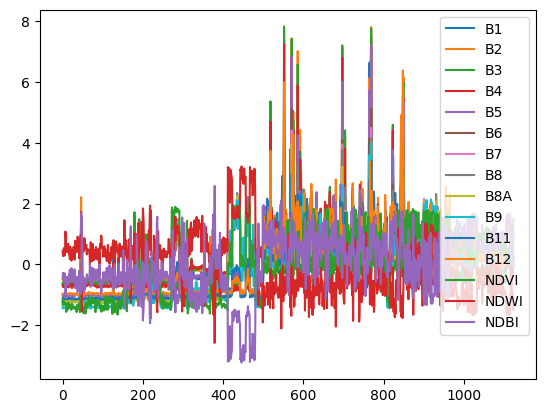

In [23]:
from scipy.stats import zscore

# Calculate z-score for each band
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'NDBI']
z_scores = Data[bands].apply(zscore)

# Display the z-scores
z_scores

#Plot the z-scores
z_scores.plot()

z_scores

In [24]:
import numpy as np

# Exclude the 'Class_Label' column for mean and std deviation calculations
numeric_data = Data.drop(columns=['Class_Label','geometry'])

# Calculate mean and standard deviation for each column
mean = numeric_data.mean()
std_dev = numeric_data.std()

# Calculate Z-scores for each column
z_scores = (numeric_data - mean) / std_dev

# Detect outliers (Z-score > 3 or Z-score < -3)
outliers = numeric_data[(z_scores > 3) | (z_scores < -3)].dropna(how='all')

if outliers.empty:
    print("No outliers detected.")
else:
    print("Outliers detected.")
    print(outliers)

outliers.count()


Outliers detected.
         B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
412     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
414     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
415     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
416     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
419     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
443     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
444     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
445     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
446     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
447     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
449     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
452     NaN     NaN     NaN     N

B1           14
B2           20
B3           19
B4           16
B5           17
B6           12
B7            7
B8            8
B8A           4
B9            3
B11           5
B12          12
NDVI          0
NDWI         20
NDBI         20
Latitude      0
Longitude     0
dtype: int64

In [25]:
Data

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0     0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1     0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2     0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3     0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4     0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1120  0.0537  0.0917  0.0972  0.1056  0.1142  0.1397  0.1434  0.1343  0.1633   
1121  0.0541  0.0937  0.1042  0.1186  0.1396  0.2060  0.2159  0.1846  0.2546   
1122  0.0463  0.0451  0.0682  0.0772  0.1137  0.1571  0.1843  0.1880  0.2070   
1123  0.0623  0.0741  0.0965  0.1262  0.1430  0.1658  0.1755  0.1848  0.1911   
1124  0.0631  0.0720  0.0894  0.1166  0.1400  0.1516  0.1578  0.1727  0.1802   

          B9     B11     B12      NDVI      NDWI      NDBI  \
0     0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387   
1     0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644   
2     0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387   
3     0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414   
4     0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286   
...      ...     ...     ...       ...       ...       ...   
1120  0.2172  0.1915  0.1507  0.119633 -0.175568  0.175568   
1121  0.2427  0.2665  0.1926  0.217678 -0.181556  0.181556   
1122  0.2366  0.2382  0.1504  0.417798 -0.117785  0.117785   
1123  0.1827  0.3008  0.2502  0.188424 -0.238880  0.238880   
1124  0.1761  0.2890  0.2336  0.193916 -0.251895  0.251895   

                        geometry Class_Label   Latitude  Longitude  
0     POINT (-91.19764 30.48437)   waterbody  30.484374 -91.197641  
1     POINT (-91.19854 30.48267)   waterbody  30.482667 -91.198540  
2      POINT (-91.1989 30.48159)   waterbody  30.481589 -91.198899  
3     POINT (-91.19629 30.48384)   waterbody  30.483835 -91.196294  
4     POINT (-91.19629 30.48177)   waterbody  30.481769 -91.196294  
...                          ...         ...        ...        ...  
1120  POINT (-91.23591 30.43658)    bareland  30.436584 -91.235910  
1121  POINT (-91.23771 30.43712)    bareland  30.437123 -91.237706  
1122  POINT (-91.23842 30.43766)    bareland  30.437662 -91.238425  
1123  POINT (-91.23025 30.43991)    bareland  30.439907 -91.230250  
1124   POINT (-91.2307 30.43856)    bareland  30.438560 -91.230699  

[1125 rows x 19 columns]

In [26]:
New_No_Outliers = Data.drop(outliers.index)
New_No_Outliers

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0     0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1     0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2     0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3     0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4     0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1120  0.0537  0.0917  0.0972  0.1056  0.1142  0.1397  0.1434  0.1343  0.1633   
1121  0.0541  0.0937  0.1042  0.1186  0.1396  0.2060  0.2159  0.1846  0.2546   
1122  0.0463  0.0451  0.0682  0.0772  0.1137  0.1571  0.1843  0.1880  0.2070   
1123  0.0623  0.0741  0.0965  0.1262  0.1430  0.1658  0.1755  0.1848  0.1911   
1124  0.0631  0.0720  0.0894  0.1166  0.1400  0.1516  0.1578  0.1727  0.1802   

          B9     B11     B12      NDVI      NDWI      NDBI  \
0     0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387   
1     0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644   
2     0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387   
3     0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414   
4     0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286   
...      ...     ...     ...       ...       ...       ...   
1120  0.2172  0.1915  0.1507  0.119633 -0.175568  0.175568   
1121  0.2427  0.2665  0.1926  0.217678 -0.181556  0.181556   
1122  0.2366  0.2382  0.1504  0.417798 -0.117785  0.117785   
1123  0.1827  0.3008  0.2502  0.188424 -0.238880  0.238880   
1124  0.1761  0.2890  0.2336  0.193916 -0.251895  0.251895   

                        geometry Class_Label   Latitude  Longitude  
0     POINT (-91.19764 30.48437)   waterbody  30.484374 -91.197641  
1     POINT (-91.19854 30.48267)   waterbody  30.482667 -91.198540  
2      POINT (-91.1989 30.48159)   waterbody  30.481589 -91.198899  
3     POINT (-91.19629 30.48384)   waterbody  30.483835 -91.196294  
4     POINT (-91.19629 30.48177)   waterbody  30.481769 -91.196294  
...                          ...         ...        ...        ...  
1120  POINT (-91.23591 30.43658)    bareland  30.436584 -91.235910  
1121  POINT (-91.23771 30.43712)    bareland  30.437123 -91.237706  
1122  POINT (-91.23842 30.43766)    bareland  30.437662 -91.238425  
1123  POINT (-91.23025 30.43991)    bareland  30.439907 -91.230250  
1124   POINT (-91.2307 30.43856)    bareland  30.438560 -91.230699  

[1075 rows x 19 columns]

***Checking for correlation***

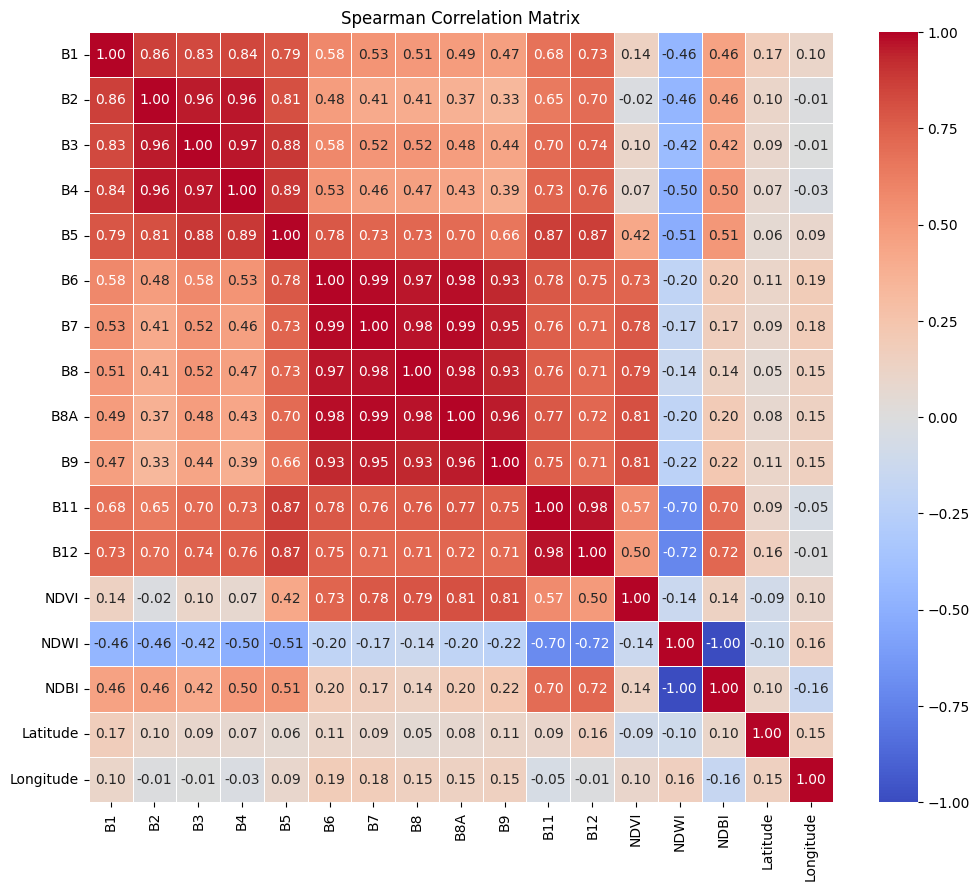

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Calculate the Spearman correlation matrix
corr, _ = spearmanr(Data.drop(columns=['Class_Label','geometry']))

# Convert the correlation matrix to a DataFrame for better visualization
corr_df = pd.DataFrame(corr, index=Data.drop(columns=['Class_Label','geometry']).columns, columns=Data.drop(columns=['Class_Label','geometry']).columns)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

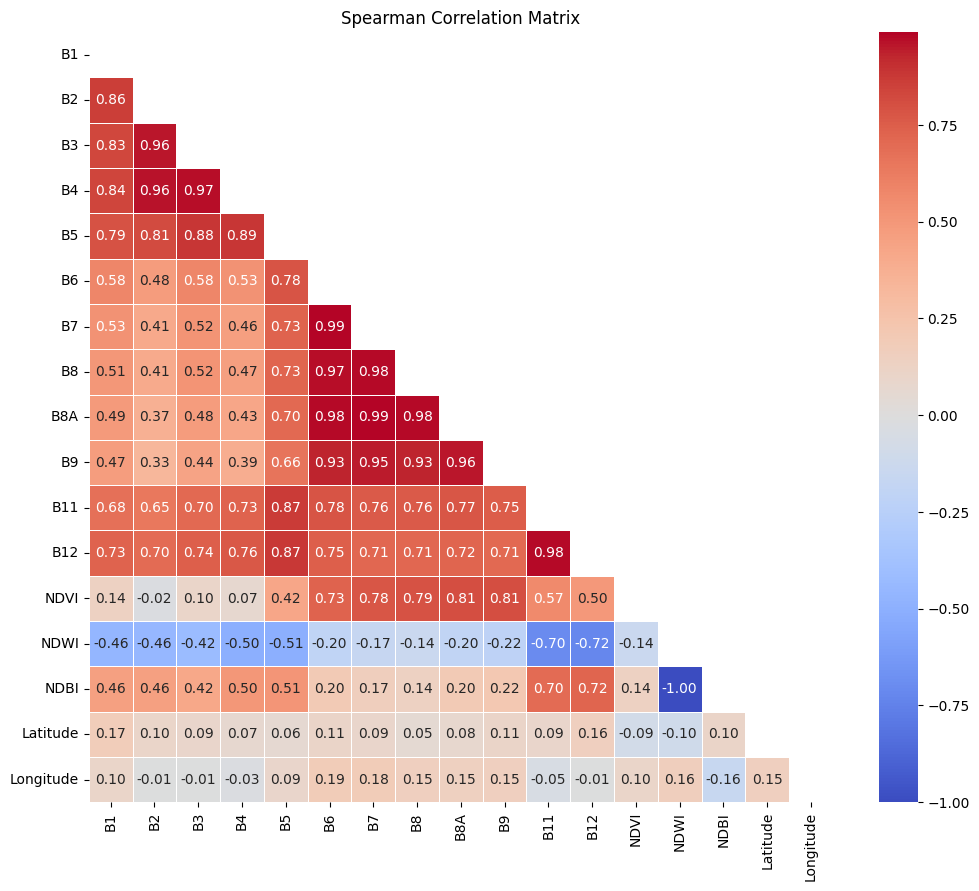

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Calculate the Spearman correlation matrix
corr, _ = spearmanr(Data.drop(columns=['Class_Label','geometry']))

# Convert the correlation matrix to a DataFrame for better visualization
corr_df = pd.DataFrame(corr, index=Data.drop(columns=['Class_Label','geometry']).columns, columns=Data.drop(columns=['Class_Label','geometry']).columns)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

## Feature Selection Based on Correlation

To determine which features to retain for the classification of Sentinel-2 bands into waterbodies, bareland, and built-up areas, the correlation of each feature with the target variable (`Class_Label`) was analyzed. The following thresholds were used to guide feature selection:

### Correlation Thresholds
- **Strong correlation**: \( |r| > 0.5 \) (high predictive power, retain these features).
- **Moderate correlation**: \( 0.3 to |r| to 0.5 \) (can be considered for retention but may require validation).
- **Weak correlation**: \( |r| < 0.3 \) (low predictive power, consider removing these features).

---

### Analysis of Features
The correlation values for each feature are as follows:

| Feature      | Correlation with `Class_Label` |
|--------------|---------------------------------|
| B1           | 0.396474                       |
| B2           | 0.385987                       |
| B3           | 0.456653                       |
| B4           | 0.485706                       |
| B5           | 0.621036                       |
| B6           | 0.552642                       |
| B7           | 0.556062                       |
| B8           | 0.585656                       |
| B8A          | 0.595818                       |
| B9           | 0.581494                       |
| B11          | 0.781669                       |
| B12          | 0.751400                       |
| NDVI         | 0.616515                       |
| NDWI         | -0.612607                      |
| NDBI         | 0.612607                       |
| Latitude     | 0.012106                       |
| Longitude    | -0.298161                      |

---

### Features to Retain
The following features show strong correlations (\( |r| > 0.5 \)) with the target variable and should be prioritized for classification:
- **B5, B6, B7, B8, B8A, B9, B11, B12**
- **NDVI, NDWI, NDBI**

These features demonstrate significant predictive power and are critical for distinguishing between waterbodies, bareland, and built-up areas.

---

### Features to Remove
The following features have weak correlations (\( |r| < 0.3 \)) and can be removed as they provide little predictive power:
- **Latitude (0.012106)**: Extremely low correlation.
- **Longitude (-0.298161)**: Weak correlation, likely not useful unless geographic information is critical to the analysis.

---

### Features for Further Validation
The following features have moderate correlations (\( 0.3 \leq |r| \leq 0.5 \)):
- **B1, B2, B3, B4**

These features are less significant compared to the others but may still contribute to model performance. Retain these for further validation by comparing model performance with and without these features.

---

### Next Steps
1. Retain the prioritized features and remove weakly correlated features.
2. Retrain the classification model and evaluate its performance using metrics such as accuracy and F1-score.
3. Validate the usefulness of moderate-correlation features (e.g., B1, B2, B3, B4) by iteratively including or excluding them.

By focusing on features with strong correlations and removing those with weak correlations, the model is expected to achieve improved accuracy and generalization.


In [29]:
Data

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0     0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1     0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2     0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3     0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4     0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1120  0.0537  0.0917  0.0972  0.1056  0.1142  0.1397  0.1434  0.1343  0.1633   
1121  0.0541  0.0937  0.1042  0.1186  0.1396  0.2060  0.2159  0.1846  0.2546   
1122  0.0463  0.0451  0.0682  0.0772  0.1137  0.1571  0.1843  0.1880  0.2070   
1123  0.0623  0.0741  0.0965  0.1262  0.1430  0.1658  0.1755  0.1848  0.1911   
1124  0.0631  0.0720  0.0894  0.1166  0.1400  0.1516  0.1578  0.1727  0.1802   

          B9     B11     B12      NDVI      NDWI      NDBI  \
0     0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387   
1     0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644   
2     0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387   
3     0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414   
4     0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286   
...      ...     ...     ...       ...       ...       ...   
1120  0.2172  0.1915  0.1507  0.119633 -0.175568  0.175568   
1121  0.2427  0.2665  0.1926  0.217678 -0.181556  0.181556   
1122  0.2366  0.2382  0.1504  0.417798 -0.117785  0.117785   
1123  0.1827  0.3008  0.2502  0.188424 -0.238880  0.238880   
1124  0.1761  0.2890  0.2336  0.193916 -0.251895  0.251895   

                        geometry Class_Label   Latitude  Longitude  
0     POINT (-91.19764 30.48437)   waterbody  30.484374 -91.197641  
1     POINT (-91.19854 30.48267)   waterbody  30.482667 -91.198540  
2      POINT (-91.1989 30.48159)   waterbody  30.481589 -91.198899  
3     POINT (-91.19629 30.48384)   waterbody  30.483835 -91.196294  
4     POINT (-91.19629 30.48177)   waterbody  30.481769 -91.196294  
...                          ...         ...        ...        ...  
1120  POINT (-91.23591 30.43658)    bareland  30.436584 -91.235910  
1121  POINT (-91.23771 30.43712)    bareland  30.437123 -91.237706  
1122  POINT (-91.23842 30.43766)    bareland  30.437662 -91.238425  
1123  POINT (-91.23025 30.43991)    bareland  30.439907 -91.230250  
1124   POINT (-91.2307 30.43856)    bareland  30.438560 -91.230699  

[1125 rows x 19 columns]

In [30]:
# Drop the 'geometry' column if it exists
if 'geometry' in Data.columns:
	Data.drop(columns=['geometry'], inplace=True)

# Define the target variable
class_label = 'Class_Label'

# Convert the class labels to numerical values, handling missing values
Data[class_label] = Data[class_label].map({'waterbody': 0, 'built_up': 1, 'bareland': 2})

# Calculate the Spearman correlation with the target variable
spearman_corr = Data.corr(method='spearman')[class_label]
print("Spearman Correlation with Target:\n", spearman_corr)


Spearman Correlation with Target:
 B1             0.396474
B2             0.385987
B3             0.456653
B4             0.485706
B5             0.621036
B6             0.552642
B7             0.556062
B8             0.585656
B8A            0.595818
B9             0.581494
B11            0.781669
B12            0.751400
NDVI           0.616515
NDWI          -0.612607
NDBI           0.612607
Class_Label    1.000000
Latitude       0.012106
Longitude     -0.298161
Name: Class_Label, dtype: float64


In [31]:
# Ensure 'Class_Label' column is present in the Data dataframe
if 'Class_Label' not in Data.columns:
    class_mapping = {1: 'waterbody', 2: 'built_up', 3: 'bareland'}
    Data['Class_Label'] = Data['Class'].map(class_mapping)

# Create the pairplot
sns.pairplot(Data[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI', 'Class_Label']],
             hue="Class_Label", diag_kind="kde")

Output hidden; open in https://colab.research.google.com to view.

### ***After Outlier and Correlation Operation***

In [32]:
Cleaned_Data = New_No_Outliers.drop(columns=['Latitude', 'Longitude'])
Cleaned_Data

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0     0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1     0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2     0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3     0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4     0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1120  0.0537  0.0917  0.0972  0.1056  0.1142  0.1397  0.1434  0.1343  0.1633   
1121  0.0541  0.0937  0.1042  0.1186  0.1396  0.2060  0.2159  0.1846  0.2546   
1122  0.0463  0.0451  0.0682  0.0772  0.1137  0.1571  0.1843  0.1880  0.2070   
1123  0.0623  0.0741  0.0965  0.1262  0.1430  0.1658  0.1755  0.1848  0.1911   
1124  0.0631  0.0720  0.0894  0.1166  0.1400  0.1516  0.1578  0.1727  0.1802   

          B9     B11     B12      NDVI      NDWI      NDBI  \
0     0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387   
1     0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644   
2     0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387   
3     0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414   
4     0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286   
...      ...     ...     ...       ...       ...       ...   
1120  0.2172  0.1915  0.1507  0.119633 -0.175568  0.175568   
1121  0.2427  0.2665  0.1926  0.217678 -0.181556  0.181556   
1122  0.2366  0.2382  0.1504  0.417798 -0.117785  0.117785   
1123  0.1827  0.3008  0.2502  0.188424 -0.238880  0.238880   
1124  0.1761  0.2890  0.2336  0.193916 -0.251895  0.251895   

                        geometry Class_Label  
0     POINT (-91.19764 30.48437)   waterbody  
1     POINT (-91.19854 30.48267)   waterbody  
2      POINT (-91.1989 30.48159)   waterbody  
3     POINT (-91.19629 30.48384)   waterbody  
4     POINT (-91.19629 30.48177)   waterbody  
...                          ...         ...  
1120  POINT (-91.23591 30.43658)    bareland  
1121  POINT (-91.23771 30.43712)    bareland  
1122  POINT (-91.23842 30.43766)    bareland  
1123  POINT (-91.23025 30.43991)    bareland  
1124   POINT (-91.2307 30.43856)    bareland  

[1075 rows x 17 columns]

B1     B2     B3     B4     B5     B6     B7     B8    B8A     B9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1120  False  False  False  False  False  False  False  False  False  False   
1121  False  False  False  False  False  False  False  False  False  False   
1122  False  False  False  False  False  False  False  False  False  False   
1123  False  False  False  False  False  False  False  False  False  False   
1124  False  False  False  False  False  False  False  False  False  False   

        B11    B12   NDVI   NDWI   NDBI  
0     False  False  False  False  False  
1     False  False  False  False  False  
2     False  False  False  False  False  
3     False  False  False  False  False  
4     False  False  False  False  False  
...     ...    ...    ...    ...    ...  
1120  False  False  False  False  False  
1121  False  False  False  False  False  
1122  False  False  False  False  False  
1123  False  False  False  False  False  
1124  False  False  False  False  False  

[1075 rows x 15 columns]

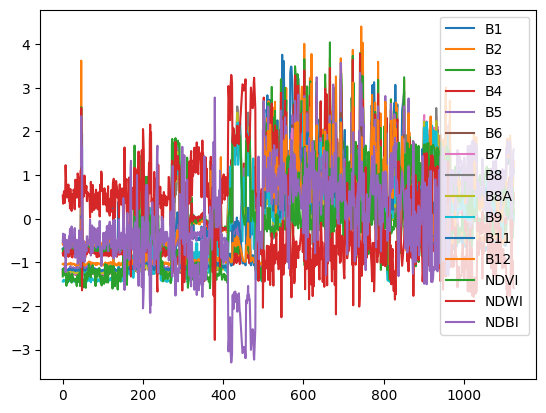

In [33]:
from scipy.stats import zscore

# Calculate z-score for each band
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'NDBI']
z_scores = Cleaned_Data[bands].apply(zscore)

# Display the z-scores
z_scores

# Plot the z-scores
z_scores.plot()

ger = z_scores > 3
ger

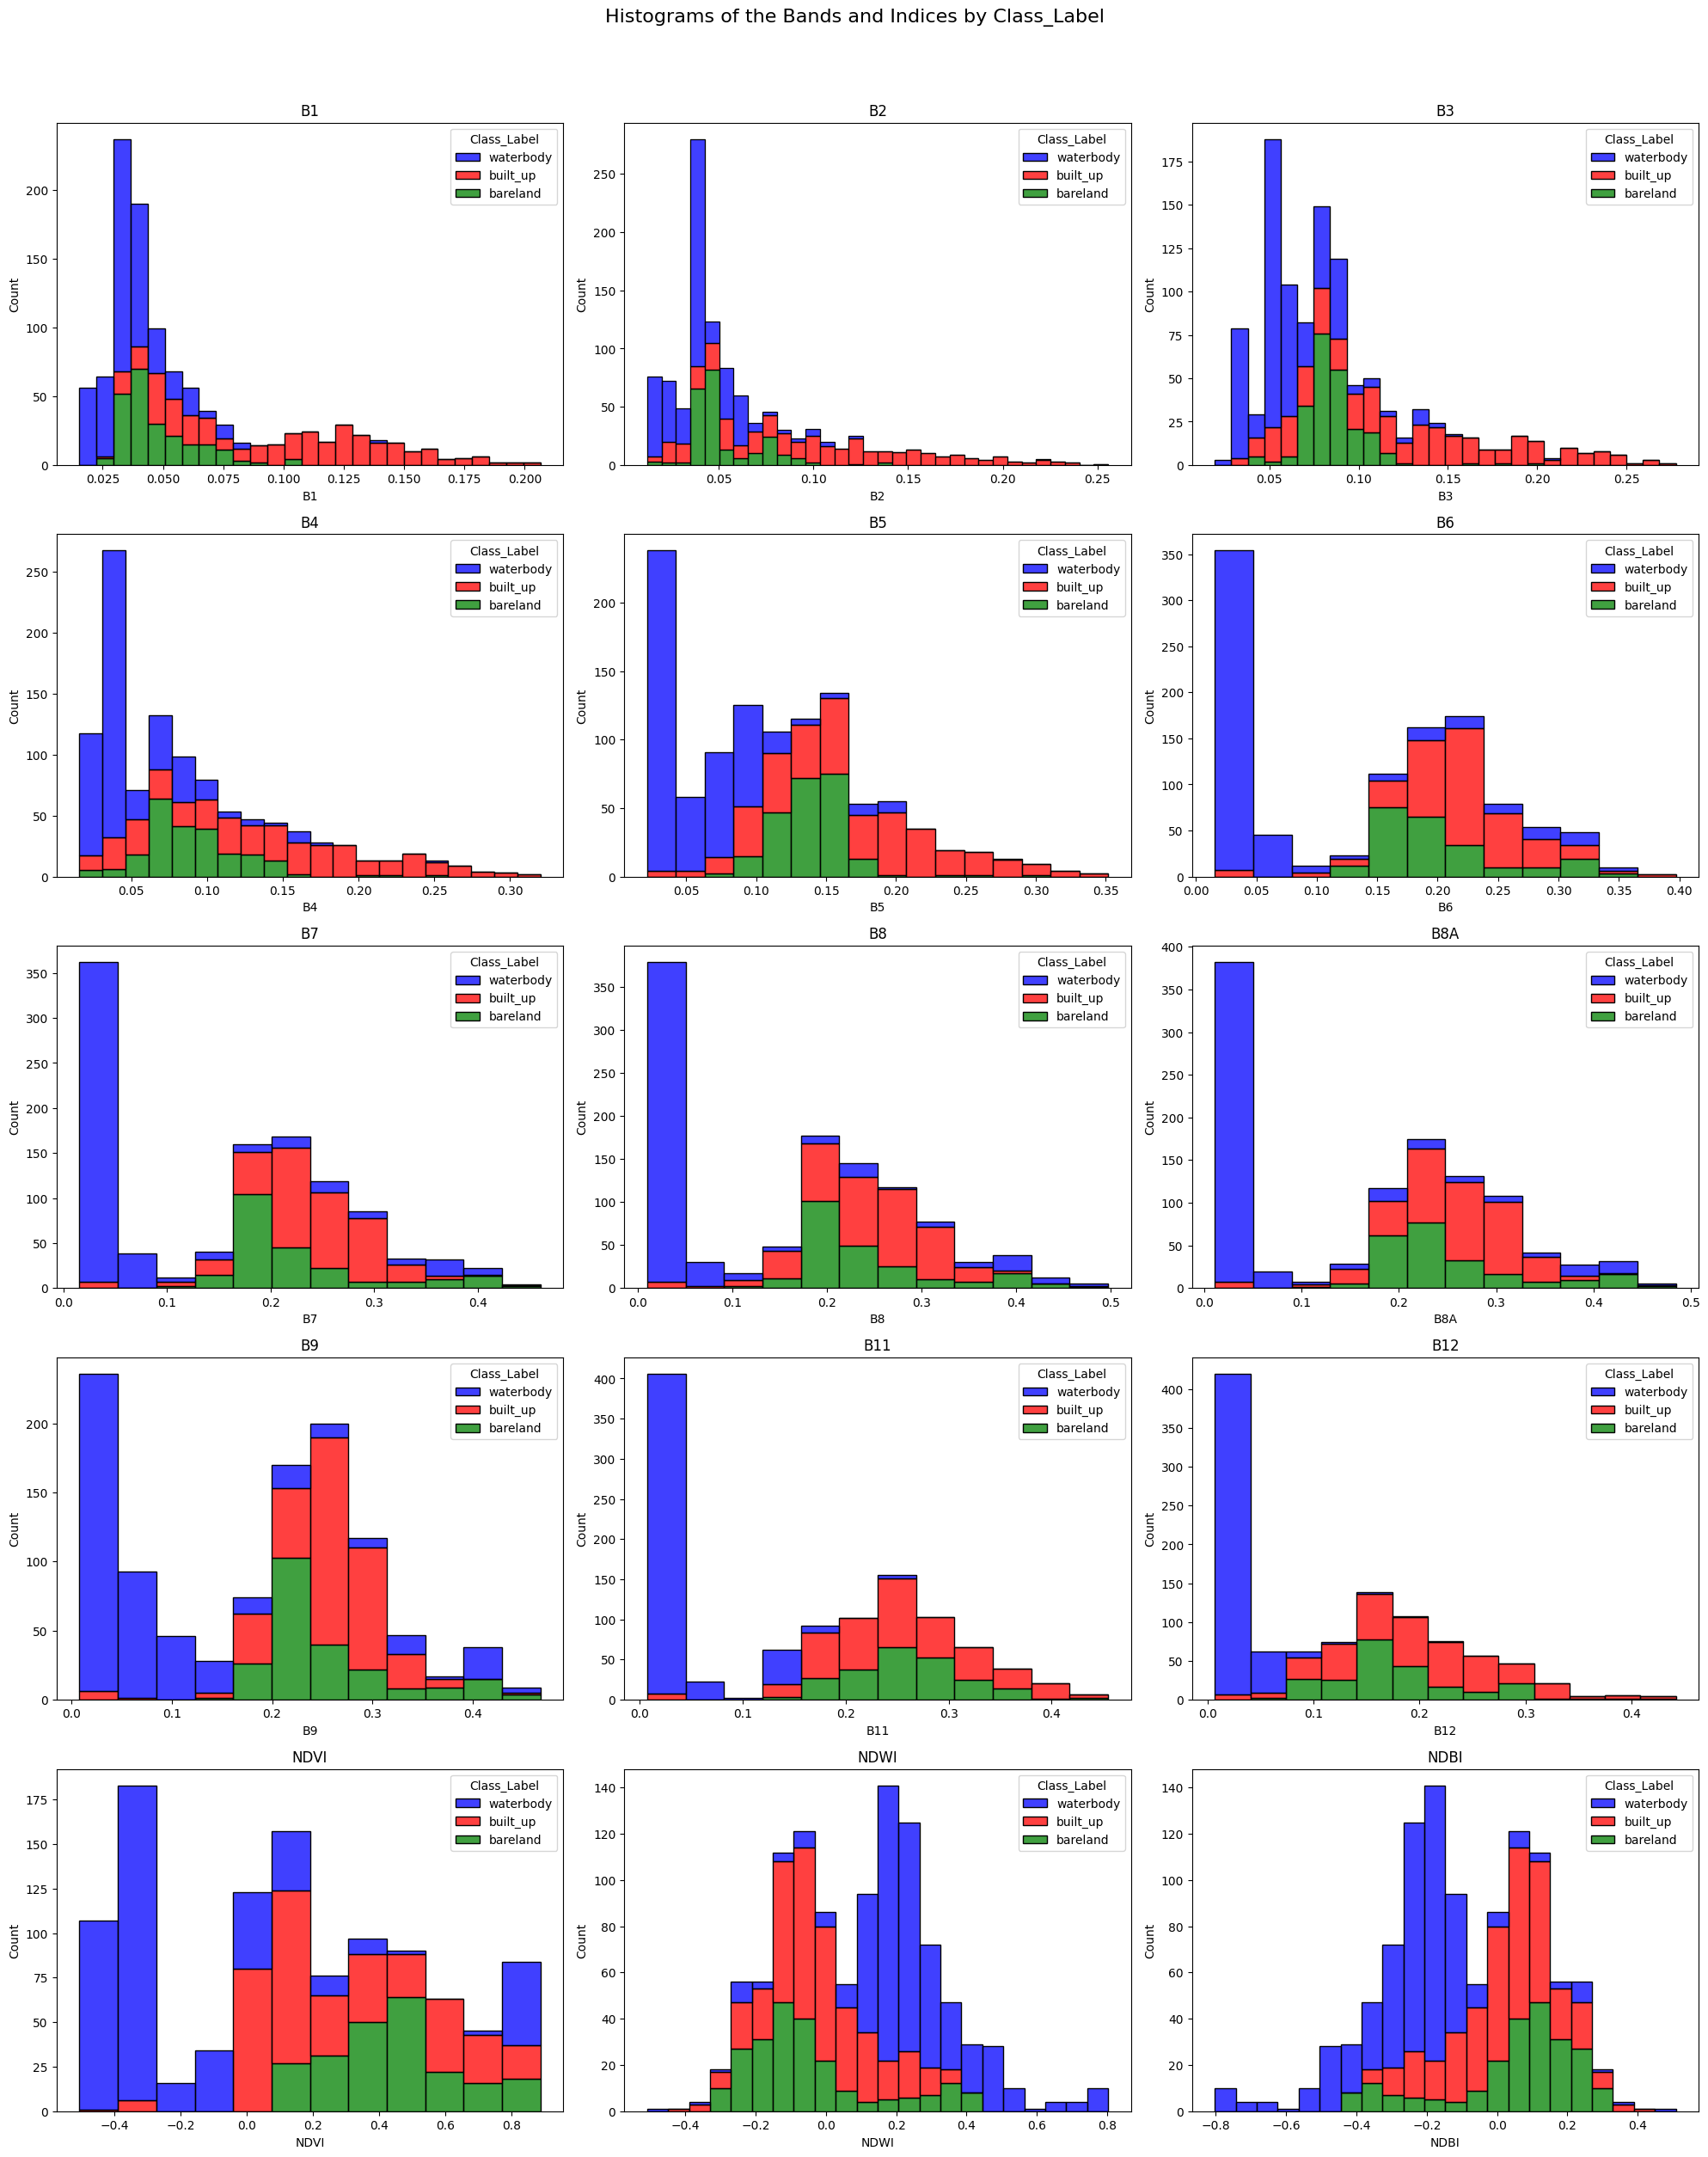

In [34]:
# Define the palette
palette = {
    'waterbody': 'blue',
    'built_up': 'red',
    'bareland': 'green'
}

# Create subplots
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
fig.suptitle('Histograms of the Bands and Indices by Class_Label', fontsize=16)

# Flatten the axes array for easy iteration
ax = ax.flatten()

# List of columns to plot
columns_to_plot = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'NDBI']

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=Cleaned_Data, x=column, hue='Class_Label', multiple='stack', palette=palette, ax=ax[i])
    ax[i].set_title(column)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

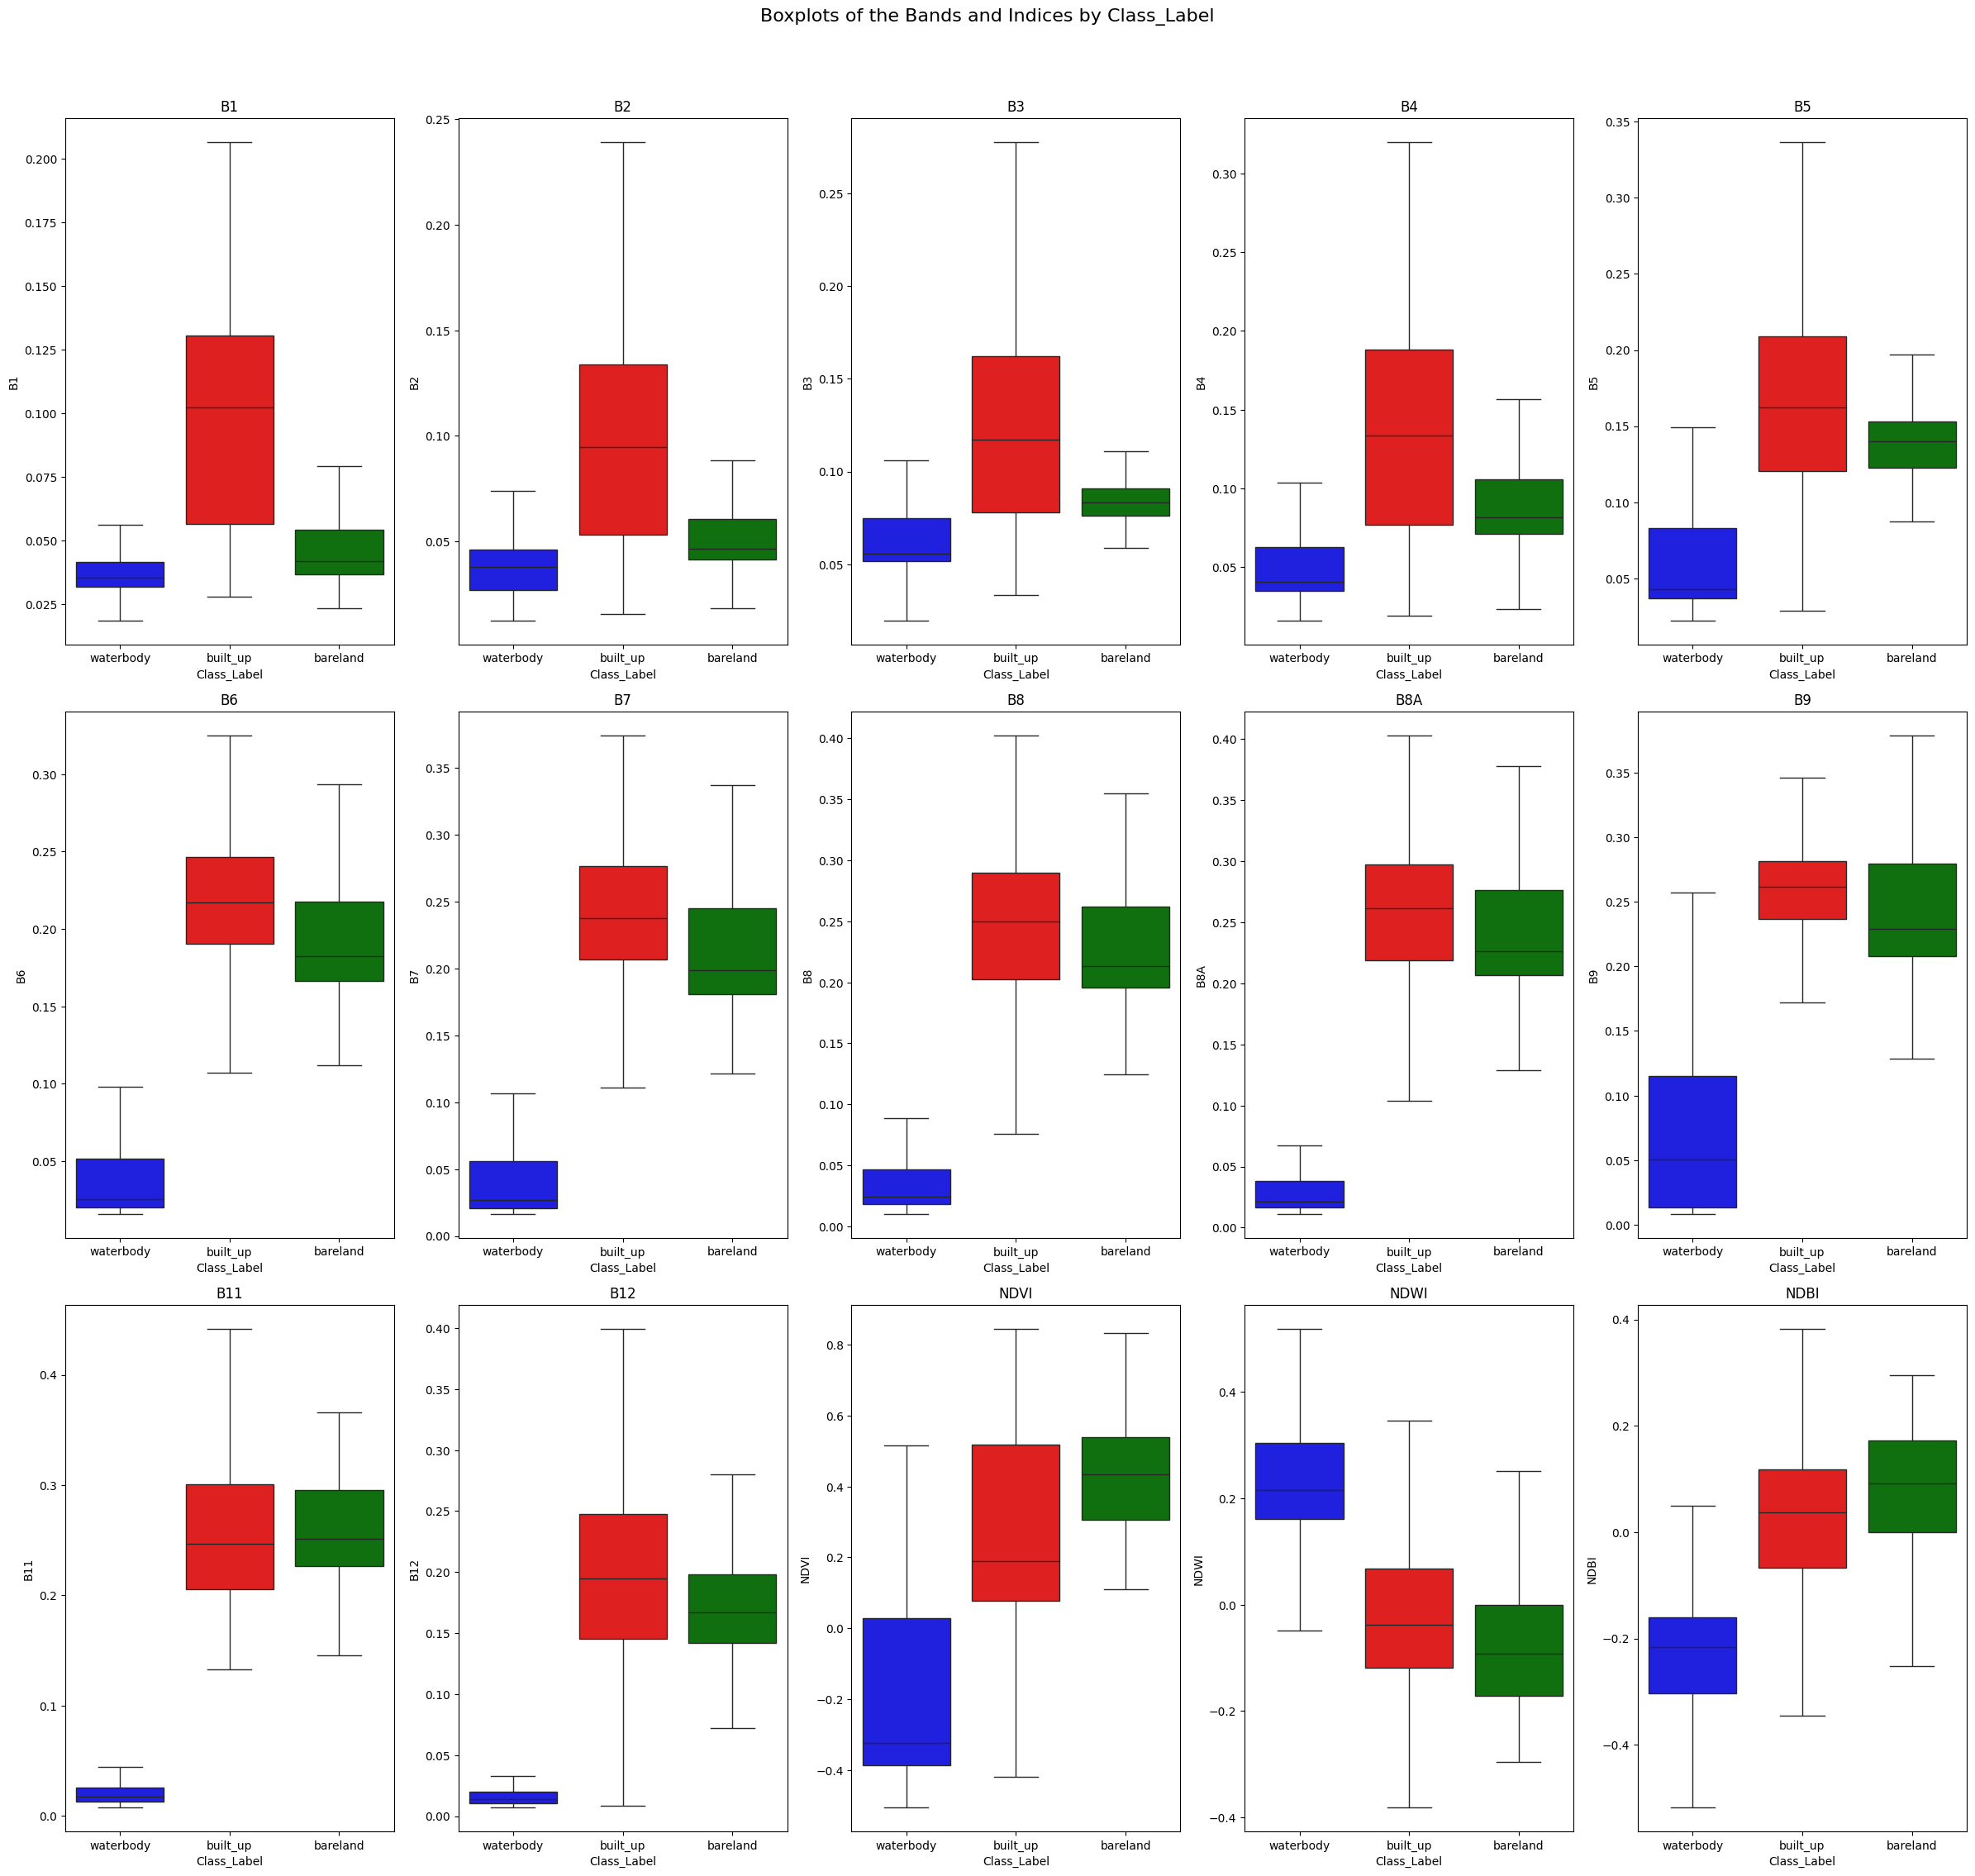

In [35]:
# Define the palette
palette = {
    'waterbody': 'blue',
    'built_up': 'red',
    'bareland': 'green'
}

# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24, 30))
fig.suptitle('Boxplots of the Bands and Indices by Class_Label', fontsize=16)

# Flatten the axes array for easy iteration
ax = ax.flatten()

# List of columns to plot
columns_to_plot = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'NDBI']

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Class_Label', y=column, data=Cleaned_Data, ax=ax[i], palette=palette, showfliers=False)
    ax[i].set_title(column)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [36]:
# Ensure 'Class_Label' column is present in the Data dataframe
if 'Class_Label' not in Data.columns:
    class_mapping = {1: 'waterbody', 2: 'built_up', 3: 'bareland'}
    Cleaned_Data['Class_Label'] = Cleaned_Data['Class'].map(class_mapping)

# Create the pairplot
sns.pairplot(Cleaned_Data[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI', 'Class_Label']],
             hue="Class_Label", diag_kind="kde")

Output hidden; open in https://colab.research.google.com to view.

### ***Feature Engineering and Dimension Reduction***

***Feature Engineering***

In [37]:
from sklearn.preprocessing import StandardScaler

# Exclude geometry column before scaling
X = Cleaned_Data.drop(columns=['Class_Label', 'geometry'])  # Assuming 'geometry' is the column with Point objects
Y = Cleaned_Data['Class_Label']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.68458948, -0.57371858, -0.71130428, ..., -1.32265631,
         0.52794851, -0.52794851],
       [-0.69230175, -0.60344983, -0.77751033, ..., -1.14475475,
         0.34396941, -0.34396941],
       [-0.689731  , -0.60344983, -0.7390681 , ..., -1.24468822,
         0.52794851, -0.52794851],
       ...,
       [-0.36324463, -0.41134018, -0.43366601, ...,  0.70990022,
        -0.96808583,  0.96808583],
       [ 0.04807678,  0.25189554,  0.17073115, ...,  0.13059646,
        -1.52865922,  1.52865922],
       [ 0.06864285,  0.20386813,  0.01909794, ...,  0.14446679,
        -1.58891041,  1.58891041]])

***Dimension Reduction***

The cumulative explained variance is 95.99680072376486 % 


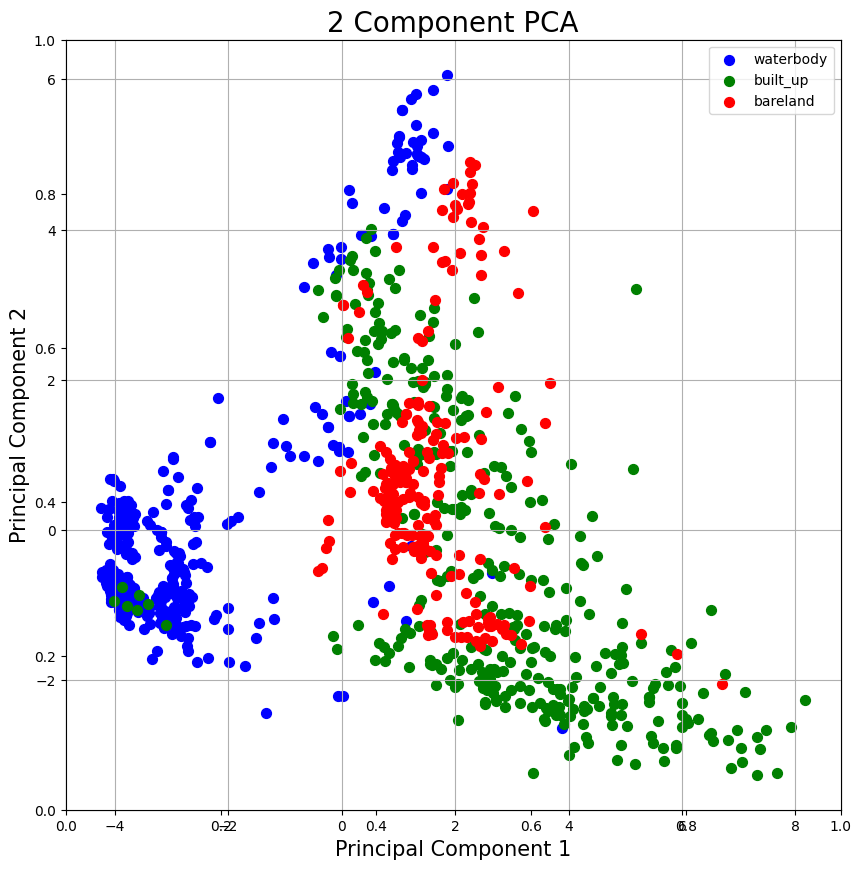

In [38]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Class_Label'] = Y.values


# Plot the PCA result
fig, ax = plt.subplots(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)
targets = ['waterbody', 'built_up', 'bareland']
colors = ['b', 'g', 'r']
for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Class_Label'] == target
    ax.scatter(pca_df.loc[indices_to_keep, 'PC1'], pca_df.loc[indices_to_keep, 'PC2'], c=color, s=50)
ax.legend(targets)
ax.grid()

# Print statement justifying reducing from 4D to 2D with variance ratio
print("The cumulative explained variance is", sum(pca.explained_variance_ratio_)*100, "% ")


In [39]:
# Calculate the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Display the percentage of variance explained by each component
for i, variance in enumerate(explained_variance_ratio):
    print(f'Principal Component {i+1}: {variance:.2f}%')

Principal Component 1: 63.15%
Principal Component 2: 22.32%
Principal Component 3: 10.53%


### ***Unsupervised Classification***

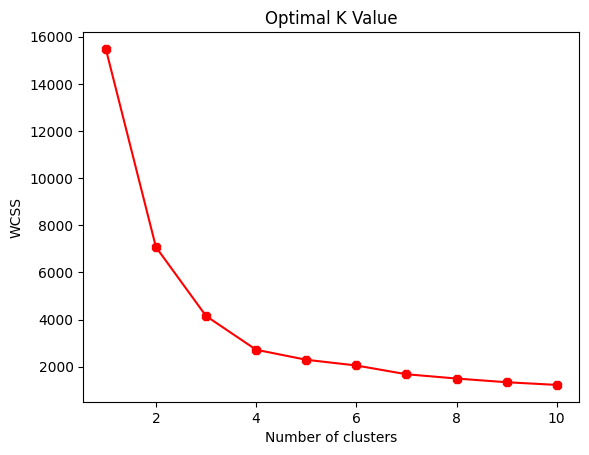

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the PCA data
pca_data = principal_components

# Calculate WCSS for different k values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_data)
    wcss.append(km.inertia_)

# Plot the WCSS to find the optimal k value
plt.plot(range(1, 11), wcss, color="red", marker="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
model=KMeans(n_clusters=3, random_state=0)
y_means = model.fit_predict(pca_data)


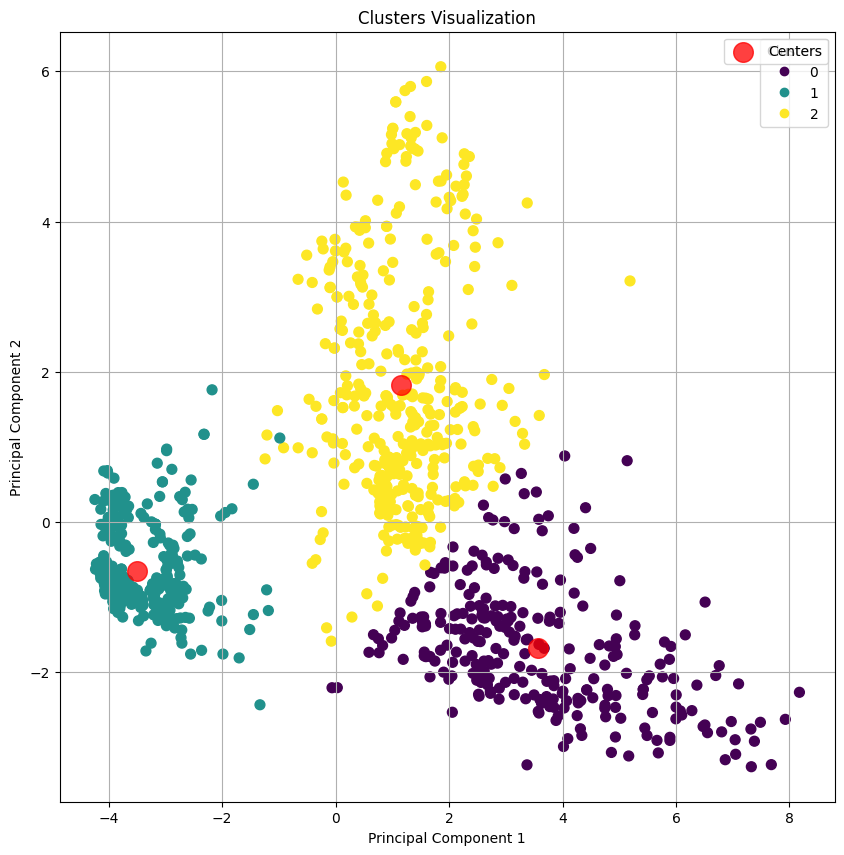

In [42]:
# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], c=y_means, cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Indicate the centers
centers = model.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='o', label='Centers')
ax.legend()

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Clusters Visualization')
ax.grid()
plt.show()



# **Supervised Classification**

In [43]:
New_No_Outliers

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0     0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1     0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2     0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3     0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4     0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1120  0.0537  0.0917  0.0972  0.1056  0.1142  0.1397  0.1434  0.1343  0.1633   
1121  0.0541  0.0937  0.1042  0.1186  0.1396  0.2060  0.2159  0.1846  0.2546   
1122  0.0463  0.0451  0.0682  0.0772  0.1137  0.1571  0.1843  0.1880  0.2070   
1123  0.0623  0.0741  0.0965  0.1262  0.1430  0.1658  0.1755  0.1848  0.1911   
1124  0.0631  0.0720  0.0894  0.1166  0.1400  0.1516  0.1578  0.1727  0.1802   

          B9     B11     B12      NDVI      NDWI      NDBI  \
0     0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387   
1     0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644   
2     0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387   
3     0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414   
4     0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286   
...      ...     ...     ...       ...       ...       ...   
1120  0.2172  0.1915  0.1507  0.119633 -0.175568  0.175568   
1121  0.2427  0.2665  0.1926  0.217678 -0.181556  0.181556   
1122  0.2366  0.2382  0.1504  0.417798 -0.117785  0.117785   
1123  0.1827  0.3008  0.2502  0.188424 -0.238880  0.238880   
1124  0.1761  0.2890  0.2336  0.193916 -0.251895  0.251895   

                        geometry Class_Label   Latitude  Longitude  
0     POINT (-91.19764 30.48437)   waterbody  30.484374 -91.197641  
1     POINT (-91.19854 30.48267)   waterbody  30.482667 -91.198540  
2      POINT (-91.1989 30.48159)   waterbody  30.481589 -91.198899  
3     POINT (-91.19629 30.48384)   waterbody  30.483835 -91.196294  
4     POINT (-91.19629 30.48177)   waterbody  30.481769 -91.196294  
...                          ...         ...        ...        ...  
1120  POINT (-91.23591 30.43658)    bareland  30.436584 -91.235910  
1121  POINT (-91.23771 30.43712)    bareland  30.437123 -91.237706  
1122  POINT (-91.23842 30.43766)    bareland  30.437662 -91.238425  
1123  POINT (-91.23025 30.43991)    bareland  30.439907 -91.230250  
1124   POINT (-91.2307 30.43856)    bareland  30.438560 -91.230699  

[1075 rows x 19 columns]

In [44]:
New_No_Outliers

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0     0.0338  0.0380  0.0552  0.0405  0.0381  0.0193  0.0210  0.0179  0.0158   
1     0.0335  0.0367  0.0521  0.0366  0.0341  0.0204  0.0205  0.0190  0.0145   
2     0.0336  0.0367  0.0539  0.0377  0.0333  0.0201  0.0199  0.0179  0.0156   
3     0.0339  0.0378  0.0556  0.0402  0.0391  0.0208  0.0212  0.0197  0.0169   
4     0.0347  0.0390  0.0570  0.0437  0.0413  0.0216  0.0215  0.0204  0.0170   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1120  0.0537  0.0917  0.0972  0.1056  0.1142  0.1397  0.1434  0.1343  0.1633   
1121  0.0541  0.0937  0.1042  0.1186  0.1396  0.2060  0.2159  0.1846  0.2546   
1122  0.0463  0.0451  0.0682  0.0772  0.1137  0.1571  0.1843  0.1880  0.2070   
1123  0.0623  0.0741  0.0965  0.1262  0.1430  0.1658  0.1755  0.1848  0.1911   
1124  0.0631  0.0720  0.0894  0.1166  0.1400  0.1516  0.1578  0.1727  0.1802   

          B9     B11     B12      NDVI      NDWI      NDBI  \
0     0.0111  0.0118  0.0108 -0.386986  0.205387 -0.205387   
1     0.0107  0.0136  0.0104 -0.316547  0.165644 -0.165644   
2     0.0160  0.0118  0.0089 -0.356115  0.205387 -0.205387   
3     0.0110  0.0124  0.0118 -0.342237  0.227414 -0.227414   
4     0.0127  0.0132  0.0124 -0.363495  0.214286 -0.214286   
...      ...     ...     ...       ...       ...       ...   
1120  0.2172  0.1915  0.1507  0.119633 -0.175568  0.175568   
1121  0.2427  0.2665  0.1926  0.217678 -0.181556  0.181556   
1122  0.2366  0.2382  0.1504  0.417798 -0.117785  0.117785   
1123  0.1827  0.3008  0.2502  0.188424 -0.238880  0.238880   
1124  0.1761  0.2890  0.2336  0.193916 -0.251895  0.251895   

                        geometry Class_Label   Latitude  Longitude  
0     POINT (-91.19764 30.48437)   waterbody  30.484374 -91.197641  
1     POINT (-91.19854 30.48267)   waterbody  30.482667 -91.198540  
2      POINT (-91.1989 30.48159)   waterbody  30.481589 -91.198899  
3     POINT (-91.19629 30.48384)   waterbody  30.483835 -91.196294  
4     POINT (-91.19629 30.48177)   waterbody  30.481769 -91.196294  
...                          ...         ...        ...        ...  
1120  POINT (-91.23591 30.43658)    bareland  30.436584 -91.235910  
1121  POINT (-91.23771 30.43712)    bareland  30.437123 -91.237706  
1122  POINT (-91.23842 30.43766)    bareland  30.437662 -91.238425  
1123  POINT (-91.23025 30.43991)    bareland  30.439907 -91.230250  
1124   POINT (-91.2307 30.43856)    bareland  30.438560 -91.230699  

[1075 rows x 19 columns]

In [45]:
New_No_Outliers['geometry']

0       POINT (-91.19764 30.48437)
1       POINT (-91.19854 30.48267)
2        POINT (-91.1989 30.48159)
3       POINT (-91.19629 30.48384)
4       POINT (-91.19629 30.48177)
                   ...            
1120    POINT (-91.23591 30.43658)
1121    POINT (-91.23771 30.43712)
1122    POINT (-91.23842 30.43766)
1123    POINT (-91.23025 30.43991)
1124     POINT (-91.2307 30.43856)
Name: geometry, Length: 1075, dtype: geometry

In [46]:
array_samples = []
for point in New_No_Outliers['geometry']:
  x = point.xy[0][0]
  y = point.xy[1][0]
  row, col = sentinel.index(x, y)  # Use the 'sentinel' object to get row and col indices
  band_value = []
  for i in range(sentinel.count):
    # Subtract 1 from col to ensure it's within the valid range (0-372)
    band_value.append(sentinel.read(i+1)[row, col - 1 if col == sentinel.width else col])
  array_samples.append(band_value)

In [47]:
X = np.array(array_samples)
X.shape
X

array([[0.042 , 0.0555, 0.0844, ..., 0.0155, 0.0136, 0.011 ],
       [0.0416, 0.0535, 0.084 , ..., 0.0169, 0.0144, 0.0112],
       [0.0417, 0.0536, 0.0846, ..., 0.0182, 0.0146, 0.0107],
       ...,
       [0.0345, 0.042 , 0.0767, ..., 0.2733, 0.2502, 0.1608],
       [0.0299, 0.0427, 0.0787, ..., 0.3549, 0.2276, 0.1553],
       [0.0319, 0.0481, 0.0763, ..., 0.3256, 0.2179, 0.1523]])

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [49]:
Y = New_No_Outliers['Class_Label'].values
labelencoder = LabelEncoder()
Y  = labelencoder.fit_transform(Y)
Y

array([2, 2, 2, ..., 0, 0, 0])

***Importing Libraries***

In [50]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### ***Model Training***

***Multi Layer Preceptron Neural Network***

In [52]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(200,),   # One hidden layer with 100 neurons
    activation='relu',           # Activation function is ReLU
    solver='adam',               # Optimizer is Adam
    alpha=0.0001,                # L2 regularization term
    batch_size='auto',           # Batch size automatically set based on sample size
    learning_rate='constant',    # Constant learning rate
    learning_rate_init=0.001,    # Initial learning rate
    power_t=0.5,                 # Exponent for inverse scaling of learning rate
    max_iter=300,                # Maximum number of iterations (epochs)
    shuffle=True,                # Shuffle data at each epoch
    random_state=None,           # No fixed random seed
    tol=1e-4,                    # Tolerance for optimization convergence
    verbose=False,               # No output during training
    warm_start=False,            # Do not reuse previous solution for warm restarts
    momentum=0.9,                # Momentum for gradient descent
    nesterovs_momentum=True,     # Use Nesterov's momentum
    early_stopping=False,        # Do not use early stopping
    validation_fraction=0.1,     # Fraction of data to set aside for validation (used if early_stopping=True)
    beta_1=0.9,                  # Beta1 for Adam optimizer
    beta_2=0.999,                # Beta2 for Adam optimizer
    epsilon=1e-8,                # Epsilon for numerical stability in Adam
    n_iter_no_change=10,         # Iterations without improvement to trigger convergence
    max_fun=15000                # Maximum function evaluations
)

**Performing cross validation**

In [53]:
kfold = StratifiedKFold(n_splits=10, random_state=None)
cv_results = cross_val_score(mlp_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('The training accuracy of MLP: %f' % cv_results.mean())

The training accuracy of MLP: 0.901790


### ***Model Testing***

In [54]:
# Fit the model
mlp_model.fit(X_train, y_train)

# Predict the labels for the test set
MLP_y_pred = mlp_model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, MLP_y_pred) * 100
print(f'Testing Accuracy: {test_accuracy:.4f}%')

# Print the concatenated predictions and actual values
print(np.concatenate((MLP_y_pred.reshape(len(MLP_y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Testing Accuracy: 88.4758%
[[2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [2 0]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [2 2]
 [1 1]
 [2 2]
 [0 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]


In [55]:
predict_img = np.nan_to_num(sentinel_image)

In [56]:
predict_img.shape

(241, 373, 12)

In [57]:
# Reshape the predict_img to a 2D array
predict_img_reshaped = predict_img.reshape(-1, predict_img.shape[2])

# Predict using the reshaped image
array_pred = mlp_model.predict(predict_img_reshaped)

In [58]:
array_pred = array_pred.reshape(sentinel_image.shape[0],sentinel_image.shape[1])

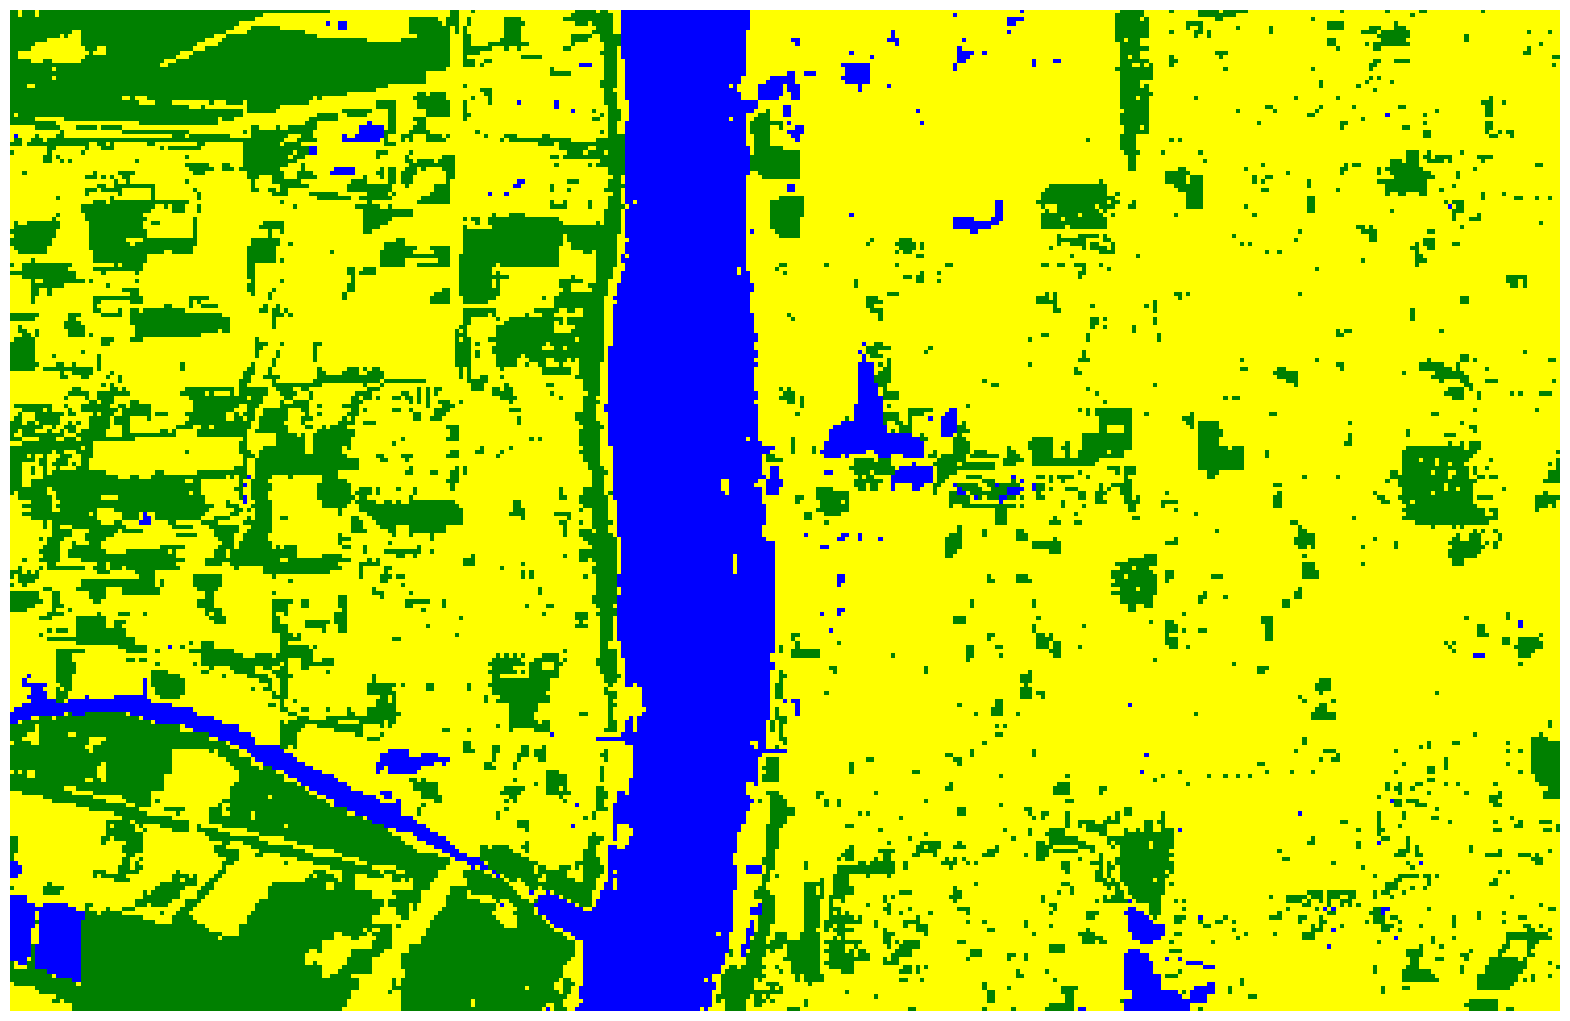

In [59]:
# Define the custom colormap
cmap = ListedColormap(['green', 'yellow', 'blue'])

# Plot the predicted image with the custom colormap
plt.figure(figsize=[20, 20])
plt.imshow(array_pred, cmap=cmap)
plt.axis('off')
plt.show()

***Support Vector Machine***

In [60]:
Svm_model = SVC(
    kernel = 'rbf',
    random_state = 0,
    C = 7.0,
    gamma = 'auto',
    shrinking = True,
    probability = False,
    tol = 0.0001,
    cache_size = 200,
    class_weight = None,
    verbose = False,
    max_iter = -1,
    decision_function_shape = 'ovr',
    )

In [61]:
kfold = StratifiedKFold(n_splits=10, random_state=None)
cv_results = cross_val_score(Svm_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('The training accuracy of SVM: %f' % cv_results.mean())

The training accuracy of SVM: 0.868364


**Model Testing**

In [63]:
# Fit the model
Svm_model.fit(X_train, y_train)

# Predict the labels for the test set
SVM_y_pred = Svm_model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, SVM_y_pred) * 100
print(f'Testing Accuracy: {test_accuracy:.4f}%')

# Print the concatenated predictions and actual values
# Removed .values from y_test as it is already a numpy array
print(np.concatenate((SVM_y_pred.reshape(len(SVM_y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Testing Accuracy: 85.5019%
[[2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [2 0]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [2 2]
 [2 2]
 [1 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 0]
 [2 2]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 0]
 [2 2]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]


In [62]:
# Fit the model
Svm_model.fit(X_train, y_train)

# Predict the labels for the test set
SVM_y_pred = Svm_model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, SVM_y_pred) * 100
print(f'Testing Accuracy: {test_accuracy:.4f}%')

# Print the concatenated predictions and actual values
print(np.concatenate((SVM_y_pred.reshape(len(SVM_y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

Testing Accuracy: 85.5019%


AttributeError: 'numpy.ndarray' object has no attribute 'values'

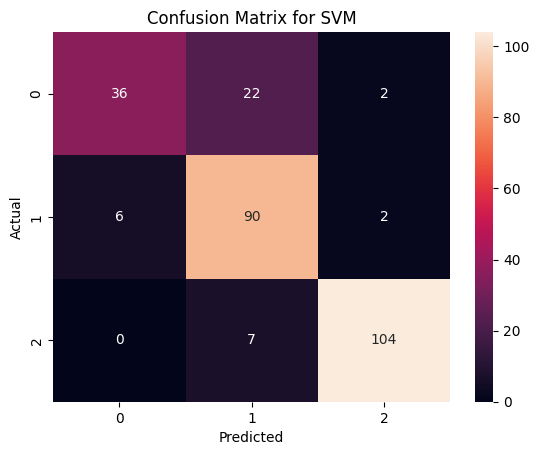

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        60
           1       0.76      0.92      0.83        98
           2       0.96      0.94      0.95       111

    accuracy                           0.86       269
   macro avg       0.86      0.82      0.83       269
weighted avg       0.86      0.86      0.85       269



In [64]:
# Generate the confusion matrix for the SVM
cm = confusion_matrix(y_test, SVM_y_pred)

# Optionally, you can visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()

# You can also generate a classification report for more detailed metrics
print(classification_report(y_test, SVM_y_pred))

**Random Forest**

In [65]:
RF_model = RandomForestClassifier(
    n_estimators = 200,
    criterion = 'gini',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
)

In [66]:
kfold = StratifiedKFold(n_splits=10, random_state=None)
cv_results = cross_val_score(RF_model, X_train, y_train, cv=kfold, scoring='accuracy')
print('The training accuracy of Random Forest: %f' % cv_results.mean())

The training accuracy of Random Forest: 0.931620


**Random Forest Model Testing**

In [68]:
# Fit the model
RF_model.fit(X_train, y_train)

# Predict the labels for the test set
RF_y_pred = RF_model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, RF_y_pred) * 100
print(f'Testing Accuracy: {test_accuracy:.4f}%')

# Print the concatenated predictions and actual values
# Removed .values from y_test as it is already a numpy array
print(np.concatenate((RF_y_pred.reshape(len(RF_y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Testing Accuracy: 92.5651%
[[2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]


In [67]:
# Fit the model
RF_model.fit(X_train, y_train)

# Predict the labels for the test set
RF_y_pred = RF_model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, RF_y_pred) * 100
print(f'Testing Accuracy: {test_accuracy:.4f}%')

# Print the concatenated predictions and actual values
print(np.concatenate((RF_y_pred.reshape(len(RF_y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

Testing Accuracy: 92.5651%


AttributeError: 'numpy.ndarray' object has no attribute 'values'

### ***Accuracy Checks***

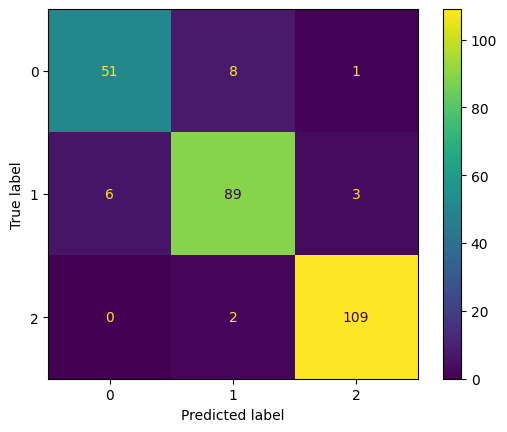

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        60
           1       0.90      0.91      0.90        98
           2       0.96      0.98      0.97       111

    accuracy                           0.93       269
   macro avg       0.92      0.91      0.92       269
weighted avg       0.93      0.93      0.93       269



In [69]:
# prompt: generate the confusion matrix for the Random forest model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Generate the confusion matrix
cm = confusion_matrix(y_test, RF_y_pred)

# Instead of RF_model.classes_, extract unique class labels from y_test
# or y_train if y_test doesn't contain all classes.
labels = np.unique(y_test)

# Create a ConfusionMatrixDisplay object with the extracted labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot()
plt.show()

# Print the classification report
print(classification_report(y_test, RF_y_pred))